In [187]:
using LinearAlgebra
using Plots, ImplicitEquations
using LatexPrint

include("Cholesky.jl")
include("Algoritmo LU.jl")

LUPP (generic function with 1 method)

# Unidad 4: Mínimos cuadrados lineales

# U4 1

1. Dados los siguientes vectores:
$$\alpha = \begin{pmatrix} 4 \\ 3  \end{pmatrix}, \;\; \beta = \begin{pmatrix} 2 \\ 1 \\ 2  \end{pmatrix}$$

encuentre la matriz de rotación $G$ y el reflector de Householder $F$ tales que 

$$G \alpha = \begin{pmatrix} 5 \\ 0  \end{pmatrix}, \;\; F \beta = \begin{pmatrix} -3 \\ 0 \\ 0  \end{pmatrix}$$


**Solución:**

Sabemos que 
        \begin{align}
            G = \begin{pmatrix}
                \cos \theta  & - \sin \theta \\
                \sin \theta &  \cos \theta
            \end{pmatrix}
        \end{align}
    y que
        \begin{align}
            \cos \theta & = \frac{\alpha_1}{|| \alpha || } = \frac{4}{5} \\
            \sin \theta  & = -\frac{\alpha_2}{||\alpha||} = - \frac{3}{5}.
        \end{align}
    Por lo tanto,
        \begin{align}
            G = \frac{1}{5} \begin{pmatrix} 4 & 3 \\
            -3 & 4\end{pmatrix}
        \end{align}.
        
Por otro lado, para construir a $F$ consideramos el vector
        \begin{align}
            v & = ||\beta || \overline{e_1}-\beta \\
            & = \begin{pmatrix}
            1 \\
            -1 \\ 
            -2
             \end{pmatrix}.
        \end{align}
    Entonces definimos 
        \begin{align}
            H & = I - 2\frac{v v^T}{v^T v} \\
            & = \frac{1}{6} ( 6I - 2v v^T) \\
            & = \frac{1}{6} \begin{pmatrix}
            4 & 2 & 4 \\
            2 & 4 & -4 \\
            4 & -4 & -2
            \end{pmatrix}.
        \end{align}
    Gracias a la teoría sabemos que
        \begin{align}
            H\beta = \begin{pmatrix}
            ||\beta|| \\
            0\\
            0
            \end{pmatrix} = \begin{pmatrix}
            3 \\
            0\\
            0
            \end{pmatrix}
        \end{align}.
    Por lo tanto, si definimos 
        \begin{align}
            F = - H = \frac{1}{6} \begin{pmatrix}
            -4 & -2 & -4 \\
            -2 & -4 & 4 \\
            -4 & 4 & 2
            \end{pmatrix}.
        \end{align}
    entonces ocurrirá que
        \begin{align}
            F \beta = \begin{pmatrix}
            -3 \\
            0\\
            0
            \end{pmatrix},
        \end{align}
    como buscábamos.


# U4 2

2. Dada la matriz 
    \begin{align}
        A = \begin{pmatrix}
        4 & 10 \\
        3 & 0
        \end{pmatrix}
    \end{align}
Calcule su factorización $QR$ (a mano) utilizando los métodos de Gram-Schmidt, reflexiones de Householder y rotaciones de Givens.

**Solución:** 

**Gram-Schmidt**: Consideramos los vectores columna de $A$: $a_1 = \begin{pmatrix} 4 \\ 3 \end{pmatrix}$, $a_2 = \begin{pmatrix}10 \\ 0 \end{pmatrix}$.  Al aplicar el método de Gram-Schmidt obtenemos los vectores
        \begin{align}
            q_1 & = \frac{a_1}{||a_1||} =\frac{1}{5} \begin{pmatrix} 4 \\ 3 \end{pmatrix}, \\
            q_2 & = \frac{a_2 - (q_1^T a_2) q_1}{ ||a_2 - (q_1^T a_2) q_1||} = \frac{1}{5} \begin{pmatrix} 3 \\ -4 \end{pmatrix}.
        \end{align}
    De esta manera,
        \begin{align}
            Q = (q_1 | q_2 ) = \frac{1}{5} \begin{pmatrix}
            4 & 3 \\
            3 & -4
            \end{pmatrix}.
        \end{align}
    Definiendo
        \begin{align}
            r_{11} & = ||a_1|| = 5, \\
            r_{12} & = q_1^T a_2 = 8, \\
            r_{22} & = ||a_2 - (q_1^Ta_2) q_1|| = 6,
        \end{align}
    obtenemos la matriz
        \begin{align}
            R = \begin{pmatrix}
                5 & 8 \\
                0 & 6
            \end{pmatrix}
        \end{align}
    Un cálculo explícito muestra que, efectivamente,
         \begin{align}
             A = QR.
         \end{align}
         
**Householder:** Para usar Householder, consideramos el vector
        \begin{align}
            x = A^1 =  \begin{pmatrix} 4 \\ 3\end{pmatrix}
        \end{align}
    y definimos
        \begin{align}
            v = ||x|| \overline{e}_1 - x.
        \end{align}
    Entonces la matriz de Householder que necesitamos es:
        \begin{align}
            H = I - 2 \frac{v v^T}{v^T v} = \frac{1}{10} \begin{pmatrix}
            8 & 6 \\
            6 & -8
            \end{pmatrix}
        \end{align}
    De esta manera, definimos
        \begin{align}
            R & = H*A \\
            & =  \begin{pmatrix}
            5 & 8 \\
            0 & 6
            \end{pmatrix}
        \end{align}
    y
        \begin{align}
            Q & = H^T \\
            &  = \frac{1}{10} \begin{pmatrix} 8 & 6 \\
            6 & -8 
            \end{pmatrix} \\
            & =\frac{1}{5} \begin{pmatrix} 
            4 & 3 \\
            3 & -4
            \end{pmatrix}
        \end{align}
    Este es el mismo resultado que el que obtuvimos mediante el método de Gram-Schmidt.
    
**Rotaciones de Givens:** Buscamos una matriz de rotación $G$ tal que
        \begin{align}
            GA = \begin{pmatrix}
            5 & ? \\
            0 & ?
            \end{pmatrix}.
        \end{align}
    Usamos la matriz $G$ que calculamos en el primer problema:
        \begin{align}
            G = \frac{1}{5}\begin{pmatrix}
            4 & 3 \\
            -3 & 4
            \end{pmatrix}.
        \end{align}
    Entonces
        \begin{align}
             R = GA = \begin{pmatrix}
            5 & 8 \\
            0 & -6
            \end{pmatrix}.
        \end{align}
    Además, si
        \begin{align}
            Q : = G^T 
        \end{align}
    entonces se verifica que $Q$ es ortogonal, $R$ es triangular superior y $QR = A$.  Notemos que aquí obtenemos un resultado distinto al que obtuvimos mediante Gram-Schmidt y mediante Householder. 

# U4 3

El siguiente problema consiste en determinar la curva de crecimiento de una población de bacterias. Los datos a utilizar son: el número de individuos de una especia particular de bacterias $(y_i)$ en el tiempo $(t_i)$.

\begin{align}
        t & = [0,4,7.5,25,31,48.75,52,58.5,72.7,78,95,96,108,112,133,136.75,143,156.5,166.7,181] \\
        y & = [8,6,6,7,8,10,13,18,33,38,76,78,164,175,280,300,320,405,385,450].
\end{align}

1. Realice un programa que calcule el polinomio de ajuste de grado $n$ (con $n$ dada por el usuario) mediante el método de Ecuaciones normales.

2. ¿Qué pasa cuando el valor de n crece?, ¿es mejor el ajuste?, ¿tiene
sentido para el fenómeno real?

In [188]:
# Datos dados. y_i es el número de individuos en el tiempo t_i.
t = [0 ; 4; 7.5; 25; 31; 48.75; 52 ; 58.5; 72.7; 78; 95; 96; 108; 112; 133; 136.75; 143; 156.5; 166.7;181]
y = [8; 6; 6; 7; 8; 10; 13; 18; 33; 38; 76; 78; 164; 175; 280; 300; 320; 405; 385; 450]

# La siguiente función toma como argumentos un número natural n dado por el usuario y los vectores de datos t,y. 
# Regresa como output la función polinomial de grado n  PolyModel(x) que mejor interpola los datos (t_i,y_i).
# Esta función se obtiene mediante ecuaciones normales.

function PolyModel(n,t,y)
    #Número de observaciones
    m = length(t) 
    
    #Calculamos la matriz de diseño A. Esta es una matriz de  mx(n+1). La entrada A_{ij} = t_i^{j-1}
    A = zeros(m,n+1);
    for i = 1:m
        for j = 1:n+1
            A[i,j] = t[i]^(j-1)
        end
    end
    
    
    #Buscamos la factorización de Cholesky de A^T A
    (L,U) = FacChol(A'*A)

    # Encontramos una solución w_0 a la ecuación lineal  Lw = A^Ty mediante la función SolFwd 
    #   (porque L es triangular inferior).
    w0 = SolFwd(L,A'*y)

    # Encontramos una solución c_0 a la ecuación lineal L^Tc = w_0 mediante la función SolBwd
    # (porque L^T es triangular superior).
    c0 = SolBwd(L',w0)
    
    #Aquí construimos la función polinomial PolyMod(x) = c0^T * (1,x, ... , x^n)^T
    function PolyFun(x)
        y = zeros(n+1)
        for i = 1:n+1
            y[i] = x^(i-1)
        end
        return c0'*y
    end
    
    return(PolyFun)
end





PolyModel (generic function with 1 method)

A continuación veremos qué tan buen modelo es el que obtuvimos. Vamos a graficar para distintos valores de $n$

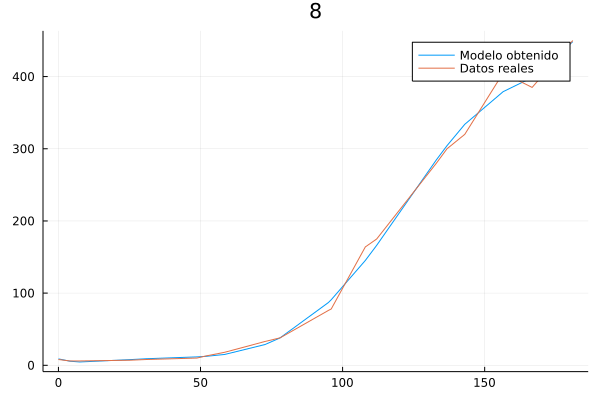

In [189]:
# Este dato lo puede cambiar el usuario. Es el grado del polinomio que 
# vamos a usar para ajustar
n = 8
g = PolyModel(n,t,y)

plot(t,[g,y], title =  n, label=["Modelo obtenido" "Datos reales" ] )

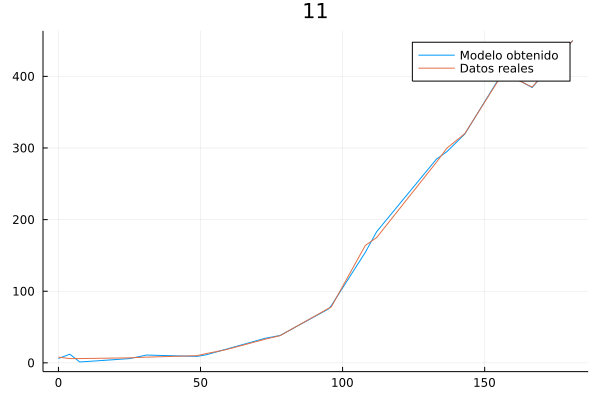

In [190]:
n = 11
g = PolyModel(n,t,y)

plot(t,[g,y], title =  n, label=["Modelo obtenido" "Datos reales" ] )

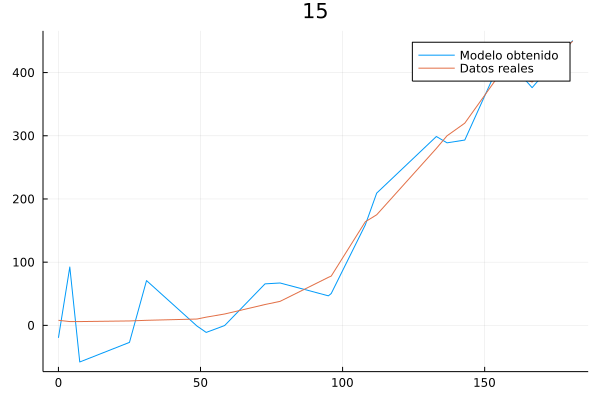

In [191]:
n = 15
g = PolyModel(n,t,y)

plot(t,[g,y], title =  n, label=["Modelo obtenido" "Datos reales" ] )

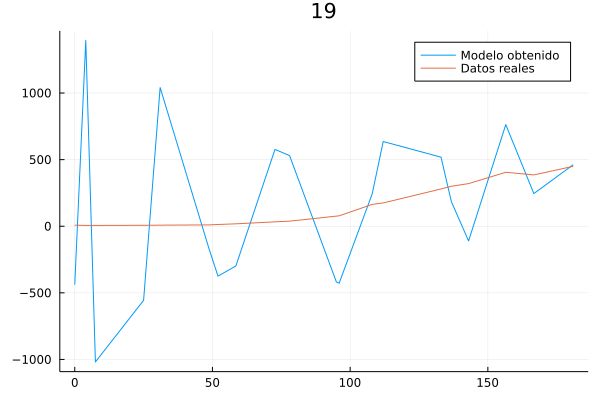

In [192]:
# Este dato lo puede cambiar el usuario. Es el grado del polinomio que 
# vamos a usar para ajustar
n = 19
g = PolyModel(n,t,y)

plot(t,[g,y], title =  n, label=["Modelo obtenido" "Datos reales" ] )

Notemos que cuando $n$ se acerca a $11$, el modelo se ajusta muy bien a los datos reales. Sin embargo, cuando $n = 19$, el modelo se aleja mucho de la realidad. De hecho, el modelo hace oscilaciones muy pronunciadas e incluso toma valores negativos muy grandes, lo cual no tiene sentido para el fenómeno real.

# U4 4
Repita el proceso utilizando la factorización QR mediante el método de
Householder. ¿Cómo son las gráficas ahora y los valores de los números de
condición de la matriz R del sistema? Concluya.

In [193]:
# Primero definiremos una función QRHouseholder que tome como input una matriz A y nos regrese la factorización QR
# obtenida mediante el método de Householder.

#Esta función toma como argumento una matriz A y regresa la matriz de Householder H tal que
# HA es una matriz cuya primera columna tiene puros ceros debajo de la diagonal
function Householder(A)
    (m,n)=size(A)

    x = A[:,1]

    e1 = zeros(m)
    e1[1] = 1.0

    v = x+sign(A[1,1])*norm(x)*e1
    v = v/norm(v)

    H = I -2*v*v'
end

#Esta función toma como argumento una matriz A de mxn. Regresa una dupla (Q,R) donde Q es una matriz ortogonal y
# R es una matriz triangular superior tales que QR = A.
function QRHouseholder(A)
    (m,n) = size(A)
    Q = Matrix(1.0*I,m,m)
    R = A

    for i = 1:n
        HTild = Householder(R[i:m,i:n] )
    
        H = Matrix(1.0*I,m,m)
        H[i:m,i:m] = HTild
    
        R = H*R
        Q = H*Q
    end
    Q = Q'
    return(Q,R)
end


# La siguiente función toma como argumentos un número natural n dado por el usuario y los vectores de datos t,y. 
# Regresa como output la función polinomial de grado n  PolyModelQR(x) que mejor interpola los datos (t_i,y_i).
# Esta función se obtiene mediante la factorización QR por el método de Householder


function PolyModelQR(n,t,y)
    #Número de observaciones
    m = length(t) 
    
    #Calculamos la matriz de diseño A. Esta es una matriz de  mx(n+1). La entrada A_{ij} = t_i^{j-1}
    A = zeros(m,n+1);
    for i = 1:m
        for j = 1:n+1
            A[i,j] = t[i]^(j-1)
        end
    end
    
    
    #Queremos resolver la ecuación  A c = y. Para esto encontramos la factorización QR de A:
    (Q,R) = QRHouseholder(A)
    
    # La ecuación se convierte en Rc= Q^Ty. Como R es triangular superior, esto lo podemos resolver por sustitución
    # hacia atrás
    
    #c0= SolBwd(R,Q'*y)
    
    #R tiene dimensiones mxn+1
    s = min(m,n+1)
    R2 = R[1:s,1:s]
    c0 = SolBwd(R2,Q'*y)        
    
    #Aquí construimos la función polinomial PolyFun(x) = c0^T * (1,x, ... , x^n)^T
    function PolyFun(x)
        b = zeros(s)
        for i = 1:s
            b[i] = x^(i-1)
        end
        return c0'*b
    end
    
    return(PolyFun)
end



PolyModelQR (generic function with 1 method)

Ahora haremos graficaremos el modelo obtenido y los datos reales para distintos valores de $n$.

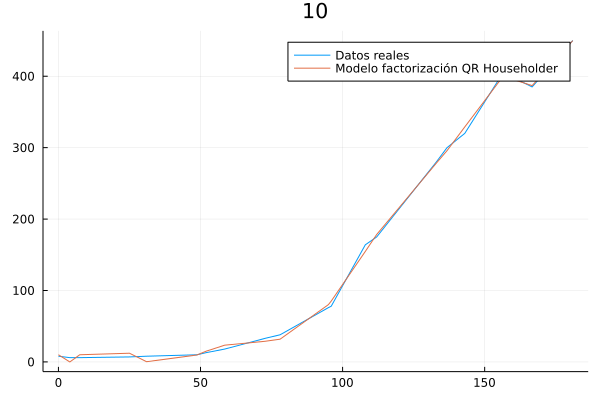

In [194]:
# Este dato lo puede cambiar el usuario. Es el grado del polinomio que 
# vamos a usar para ajustar. Necesitas m > n
n = 10

#Modelo a partir de algoritmo QR
h = PolyModelQR(n,t,y)


plot(t,[y,h], title =  n, label=["Datos reales" "Modelo factorización QR Householder" ] )

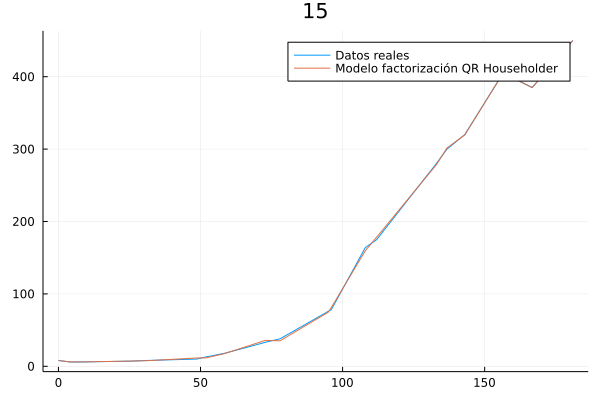

In [195]:
# Este dato lo puede cambiar el usuario. Es el grado del polinomio que 
# vamos a usar para ajustar. Necesitas m > n
n = 15

#Modelo a partir de algoritmo QR
h = PolyModelQR(n,t,y)


plot(t,[y,h], title =  n, label=["Datos reales" "Modelo factorización QR Householder" ] )

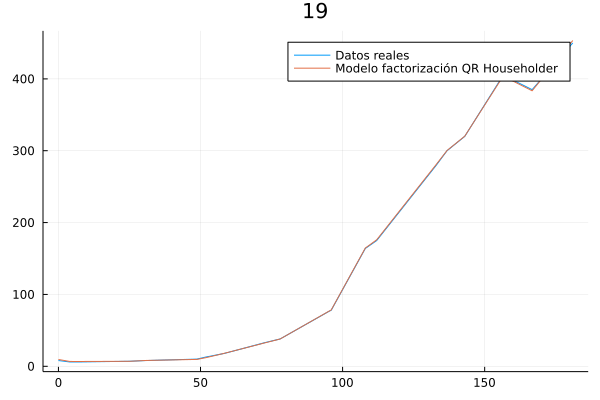

In [196]:
# Este dato lo puede cambiar el usuario. Es el grado del polinomio que 
# vamos a usar para ajustar. Necesitas m > n
n = 19

#Modelo a partir de algoritmo QR
h = PolyModelQR(n,t,y)


plot(t,[y,h], title =  n, label=["Datos reales" "Modelo factorización QR Householder" ] )

Observemos que los datos se ajustan muy bien al modelo.

Finalmente, ¿cuál es el número de condición de la matriz R? 

Evidentemente, este número depende del valor de $n$. Hagamos una tabla para los distintos valores de $n$

In [197]:
m = length(t)
ConditionR = zeros(19)
ConditionNormal = zeros(19)
N = zeros(19)
# Para cada n de 1 a 19, calculamos el número de condición de R y de las matrices A'*A

for n = 1:19
    N[n] = n
   A = zeros(m,n+1);
    for i = 1:m
        for j = 1:n+1
            A[i,j] = t[i]^(j-1)
        end
    end
    (Q,R) = QRHouseholder(A) 
    ConditionR[n] = cond(R)
    ConditionNormal[n] = cond(A'*A)
end

Table = [N'; ConditionR'; ConditionNormal']'

lap(Table)



\left[
\begin{array}{ccc}
1.0 & 187.25029863335945 & 35062.67433828433 \\
2.0 & 34918.52335869614 & 1.2193032735740993e9 \\
3.0 & 6.261546153092644e6 & 3.92069609137215e13 \\
4.0 & 1.1261969033630772e9 & 1.2682213500233848e18 \\
5.0 & 2.0774101372219263e11 & 1.5373901344564632e23 \\
6.0 & 3.871924646072298e13 & 2.1068354153073705e26 \\
7.0 & 8.107708514361775e15 & 6.615572427374224e29 \\
8.0 & 1.471594394070287e18 & 1.4763598407746939e34 \\
9.0 & 7.762495610404213e20 & 1.8564396390630998e37 \\
10.0 & 1.1385290757354841e25 & 1.759474976951025e41 \\
11.0 & 1.0331067176441162e27 & 2.8154417452613565e45 \\
12.0 & 3.5852064747051696e28 & 1.3037370407111056e47 \\
13.0 & 1.2007225119784896e31 & 1.2227978374097504e52 \\
14.0 & 1.1743276017330145e34 & 4.6182823185956895e54 \\
15.0 & 9.097797082544422e36 & 8.396470942652052e57 \\
16.0 & 5.2900274683857616e39 & 1.4016749297356005e61 \\
17.0 & 1.8767350905081065e42 & 2.2727191837443505e64 \\
18.0 & 1.224429137043985e46 & 6.003779878524312e66 \\
19


\begin{array}{|| c| c| c||}
n & cond(R) & cond(A^T A) \\ \hline
1.0 & 187.25029863335945 & 35062.67433828433 \\ \hline
2.0 & 34918.52335869614 & 1.2193032735740993e9 \\ \hline
3.0 & 6.261546153092644e6 & 3.92069609137215e13 \\ \hline
4.0 & 1.1261969033630772e9 & 1.2682213500233848e18 \\ \hline
5.0 & 2.0774101372219263e11 & 1.5373901344564632e23 \\ \hline
6.0 & 3.871924646072298e13 & 2.1068354153073705e26 \\ \hline
7.0 & 8.107708514361775e15 & 6.615572427374224e29 \\ \hline
8.0 & 1.471594394070287e18 & 1.4763598407746939e34 \\ \hline
9.0 & 7.762495610404213e20 & 1.8564396390630998e37 \\ \hline
10.0 & 1.1385290757354841e25 & 1.759474976951025e41 \\ \hline
11.0 & 1.0331067176441162e27 & 2.8154417452613565e45 \\ \hline
12.0 & 3.5852064747051696e28 & 1.3037370407111056e47 \\ \hline
13.0 & 1.2007225119784896e31 & 1.2227978374097504e52 \\ \hline
14.0 & 1.1743276017330145e34 & 4.6182823185956895e54 \\ \hline
15.0 & 9.097797082544422e36 & 8.396470942652052e57 \\ \hline
16.0 & 5.2900274683857616e39 & 1.4016749297356005e61 \\ \hline
17.0 & 1.8767350905081065e42 & 2.2727191837443505e64 \\ \hline
18.0 & 1.224429137043985e46 & 6.003779878524312e66 \\ \hline
19.0 & 3.2558873635130327e49 & 1.942622974415792e70 \\ \hline
\end{array}


Notemos que aunque ni $R$ ni $A^TA$ están bien condicionadas, $R$ está mucho mejor condicionada.


# U4 5


Considere los siguientes datos, obtenidos de un experimento a intervalos de un segundo, con la primera observación en el tiempo $t = 1.0$:

\begin{array}{||c | c | c ||} \hline
t:1 - 9   &  t: 10 -18  &  t: 19 - 25  
 \\            \hline
5.0291 & 7.5677 & 14.5701 \\ 
6.5009 & 7.2920 &  17.0440 \\
5.3666 &  10.0357 & 17.0398  \\ 
4.1272 &  11.0708 & 15.9069  \\
4.2948 & 13.4045 &  15.4850 \\ 
6.1261 & 12.8415 &  15.5112 \\
12.5140 & 11.9666  &  17.6572 \\
10.0502 &  11.0765 & \\
9.1614 & 11.7774  & \\ \hline
\end{array}


 

1. Utilizando las ecuaciones normales, ajuste los datos por una línea recta $y(t) = \beta_1 + \beta_2 t$ y grafique los residuales $y(t_k)-y_k$. Observe que uno de los datos tiene un residual mucho mayor que el resto. Sospechamos que no encaja con el resto de los datos, es decir, es un valor atípico.



 
 










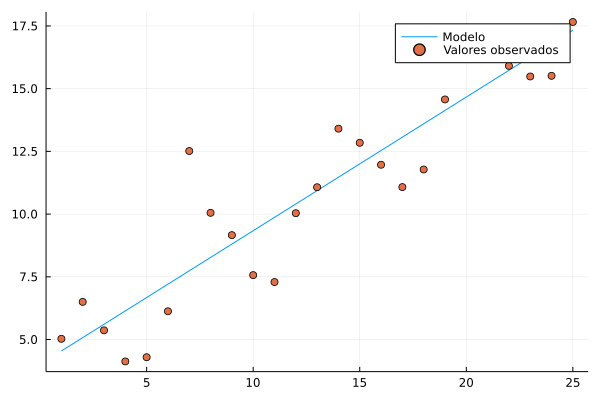

In [198]:
# Vectores de datos
t = collect(1:25)
y = [ 5.0291; 6.5009; 5.3666; 4.1272 ; 4.2948; 6.1261; 12.5140; 10.0502; 9.1614; 7.5677; 7.2920; 10.0357; 
    11.0708; 13.4045; 12.8415; 11.9666; 11.0765; 11.7774; 14.5701; 17.0440; 17.0398; 15.9069; 15.4850; 15.5112;
    17.6572 ]

#Cantidad de datos
m = length(t)

#La matriz de diseño tendrá dos columnas. Cada renglón de la forma (1 t_i)
A = ones(m,2)
A[:,2] = A[:,2].*t

# Ahora queremos resolver el sistema de ecuaciones normales A^TAc = A^Ty
# Calculamos la factorización de Cholesky de A^T A

(L,U) = FacChol(A'*A)

#Encontramos una solución w_0 a la ecuación lineal Lw = A^Ty mediante sustitución hacia adelante
w0 = SolFwd(L,A'*y)

# Encontramos una solución c_0 a la ecuación lineal L^T c = w_0 mediante sustitución hacia atrás
c0 = SolBwd(U,w0)

beta1 = c0[1]
beta2 = c0[2]

# Definimos la función modelo y(t)
function yModel(t)
   beta1+beta2*t 
end

# Vector de residuales
Residuales = yModel.(t).-y

# Graficaremos las obsevaciones (t_i,y_i) y la función y(t_i)
#plot(t,[yModel,y])

plot(t, yModel, label = "Modelo ")
scatter!(t,y, label = "Valores observados")

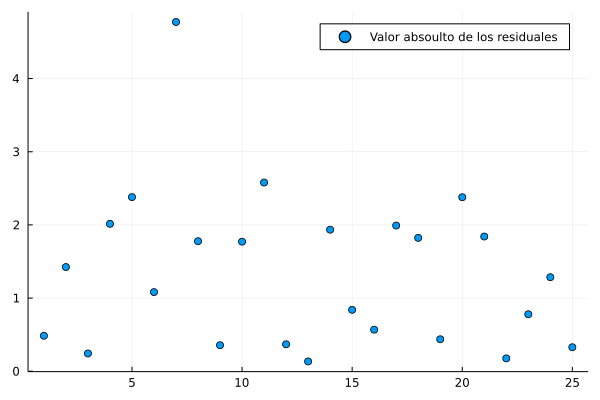

In [199]:
#Graficaremos los residuales
scatter(t, abs.(Residuales), label = "Valor absoulto de los residuales")

b) Desecehe el valor atípico y ajuste nuevamente los datos con una línea react. Una vez más, grafique los residuales. ¿Qué patrón se observa en la gráfica de residuales? ¿Los residuos parecen aleatorios?

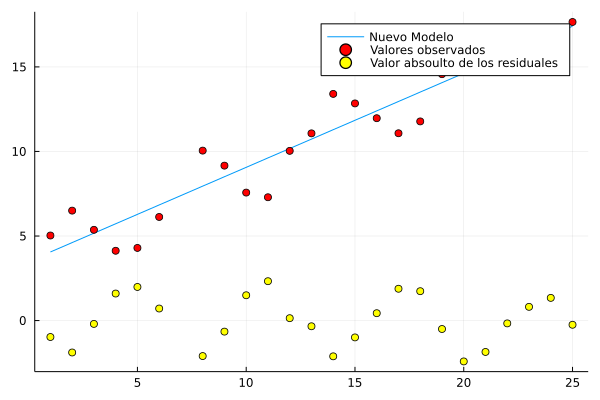

In [200]:
# Buscamos el índice del residual con valor absoluto más grande
# y quitamos esa entrada de los vectores t,y

tNew = deleteat!(copy(t),   argmax(abs.(Residuales)) )
yNew = deleteat!(copy(y), argmax(abs.(Residuales)))

# Volvemos a encontrar un modelo pero ahora usando las observaciones de 
# tNew, yNew

#Cantidad de datos
m = length(tNew)

#La matriz de diseño tendrá dos columnas. Cada renglón de la forma (1 t_i)
A = ones(m,2)
A[:,2] = A[:,2].*tNew

# Ahora queremos resolver el sistema de ecuaciones normales A^TAc = A^Ty
# Calculamos la factorización de Cholesky de A^T A

(L,U) = FacChol(A'*A)

#Encontramos una solución w_0 a la ecuación lineal Lw = A^Ty mediante sustitución hacia adelante
w0 = SolFwd(L,A'*yNew)

# Encontramos una solución c_0 a la ecuación lineal L^T c = w_0 mediante sustitución hacia atrás
c0 = SolBwd(U,w0)

beta1 = c0[1]
beta2 = c0[2]

# Definimos la función modelo y(t)
function yModelNew(t)
   beta1+beta2*t 
end

# Vector de residuales
ResidualesNew = yModelNew.(tNew).-yNew

# Graficamos el modelo,los datos reales y los residuales
plot(tNew, yModelNew, label = "Nuevo Modelo ")
scatter!(tNew, yNew , label = "Valores observados", color = "red")
scatter!(tNew, ResidualesNew, label = "Valor absoulto de los residuales", color = "yellow")

Los residuales ahora son pequeños en valor absoluto. Notemos que parecen seguir una distribución sinusoidal.

c) Para deshacerse de las tendencias de los residuos, ajustar los datos (ya sin el valor atípico) con un nuevo modelo:
    
\begin{align}
    y(t) = \beta_1+\beta_2 t + \beta_3 \sin(t)
\end{align}

Grafica los residuales. ¿Parecen azarosos ahora?

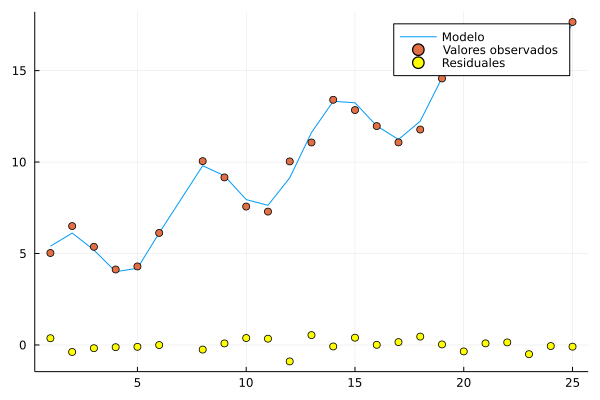

In [201]:
#La matriz de diseño tendrá tres columnas. Cada renglón de la forma
# (1 t_i sin(t_i))
A = ones(m,3)
A[:,2] = A[:,2].*tNew
A[:,3] = sin.(tNew)


# Ahora queremos resolver el sistema de ecuaciones normales A^TAc = A^Ty
# Calculamos la factorización de Cholesky de A^T A

(L,U) = FacChol(A'*A)

#Encontramos una solución w_0 a la ecuación lineal Lw = A^Ty mediante sustitución hacia adelante
w0 = SolFwd(L,A'*yNew)

# Encontramos una solución c_0 a la ecuación lineal L^T c = w_0 mediante sustitución hacia atrás
c0 = SolBwd(U,w0)

beta1 = c0[1]
beta2 = c0[2]
beta3 = c0[3]

# Definimos la función modelo y(t)
function yTrig(t)
   beta1+beta2*t +beta3*sin(t)
end

# Vector de residuales
ResidualesTrig = yTrig.(tNew).-yNew

# Graficaremos las obsevaciones (t_i,y_i), la función modelo y los residuales


plot(tNew, yTrig, label = "Modelo ")
scatter!(tNew,yNew, label = "Valores observados")
scatter!(tNew,ResidualesTrig, label= "Residuales", color = "yellow")

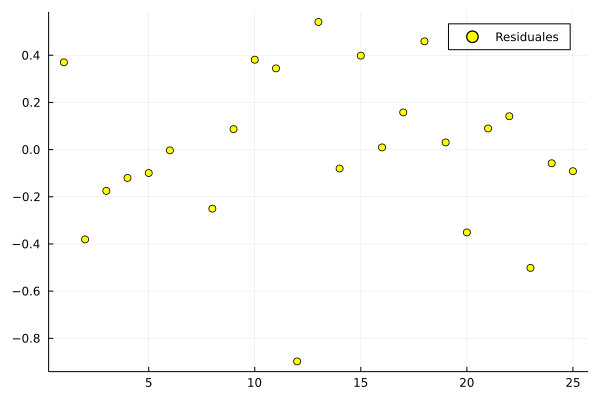

In [202]:
scatter(tNew,ResidualesTrig, label= "Residuales", color = "yellow")

Los residuales ahora sí parecen azarosos.

# U4 6 [PENDIENTE]

Un fenómeno que puede presentarse al utilizar el método de Gram-Schmidt es la pérdida de ortogonalidad. En una A.P.F. de 5 dígitos con redondeo, considere la siguiente matriz:
    \begin{align}
        A = \begin{bmatrix}
            0.70001 & 0.70711 \\
            0.70002 & 0.70711
        \end{bmatrix}
    \end{align}

Observe que la matriz es cercana a una de rango deficiente.

a) Calcule el primer paso de Gram-Schmidt (es decir, $j=1$) para obtener $r_{11}$ y $q_1$.

b) Calcule el segundo paso y obtenga $r_{12},r_{22}$ y $q_2$.

c) Utilizando los incisos anteriores dé la forma de las matrices $Q$ y $R$ de la factorización $QR$ de $A$.

d) ¿Las columnas de $!$ son ortogonales? ¿Cómo afecta el rango deficiente de $A$ a las columnas que se obtuvieron de $Q$ ? Concluya


# U4 7

Para matrices que son de rango deficiente es natural observar una pérdida de ortogonalidad en la matriz $Q$ de la factorización $QR$. Po ejemplo, para la matriz
\begin{align}
    A = \begin{pmatrix}
        1 & 1 & 1 \\
        1 & 1 & 1 \\
        1 & 1 & 1 
    \end{pmatrix}
\end{align}

Un experimento interesante consiste en perturbar ligeramente la matriz de tal forma que
\begin{align}
    A = \begin{pmatrix}
        1 & 1 & 1+\epsilon \\
        1+\epsilon & 1 & 1 \\
        1 & 1+\epsilon & 1 
    \end{pmatrix}
\end{align}
con $\epsilon$ pequeño. Tomando esta matriz perturbada, realice lo siguiente para valores de $\epsilon = 10^{-n}$ con $n = 0,1, \dots ,15$.

a)
La factorización $QR$ de la matriz por el méotodo de Gram-Schmidt y verifique la ortogonalidad de la matriz $Q$ resultante calculando la norma $|| Q^T Q -I||$.

b) El mismo proceso pero mediante el método de reflexiones de Householder.

c) El mismo proceso pero mediante el método de rotaciones de Givens.

Elabore una tabla donde ilustre y pueda comparar los resultados. ¿Qué puede concluir acerca de los métodos de factorización $QR$ para matrices cercanas a una de rango deficiente?, ¿cuál preserva mejor la ortogonalidad?


In [203]:
############ Gram-Schmidt

# Aquí vamos a guardar los resultados del cálculo
NormasGS = zeros(16)

for n = 0:15
    # Matriz perturbada
    epsilon = 10.0^(-n)
    A = [1 1 1+epsilon; 1+epsilon 1 1; 1 1+epsilon 1]
    
    # Vamos a encontrar la factorización QR mediante el método de
    # Gram-Schmidt

    #Aquí vamos hay ir guardando los vectores q y las v
    QMatrix =  Matrix(1.0*I,3,3)
    VMatrix = Matrix(1.0*I,3,3)
    
    VMatrix[:,1] = A[:,1]
    QMatrix[:,1] = VMatrix[:,1]/norm(VMatrix[:,1])

    VMatrix[:,2] = A[:,2]-(QMatrix[:,1]'*A[:,2])*QMatrix[:,1]
    QMatrix[:,2] = VMatrix[:,2]/(norm(VMatrix))

    VMatrix[:,3] = A[:,3]-(QMatrix[:,1]'*A[:,3])*QMatrix[:,1]-(QMatrix[:,2]'*A[:,3])*QMatrix[:,2]
    QMatrix[:,3] = VMatrix[:,3]/norm(VMatrix[:,3])
    
    NormasGS[n+1] = norm(QMatrix'*QMatrix-I)
end

############# Householder

#Aquí vamos a guardar los resultados del cálculo:
NormasHouse = zeros(16)

for n = 0:15
    # Matriz perturbada
    epsilon = 10.0^(-n)
    A = [1 1 1+epsilon; 1+epsilon 1 1; 1 1+epsilon 1]
    
    #Factorización QR de A
    (Q,R) = QRHouseholder(A)
    
    NormasHouse[n+1] = norm(Q'*Q-I)
end

############### Rotaciones de Givens

### Primero definiremos funciones que nos permiten calcular la factorización QR
# mediante rotaciones de Givens.


# Esta función toma un vector x de nxn y dos índices i,j \leq n
# Regresa una matriz de rotación G tal que y = Gx tiene su j-ésima 
# entrada es igual a 0
function Givens(i,j,x)
    n = length(x)
    G = Matrix(1.0*I,n,n) 
    G[i,i] = x[i]/(sqrt(x[i]^2+x[j]^2))
    G[j,j] = G[i,i]
    G[j,i] = -x[j]/(sqrt(x[i]^2+x[j]^2))
    G[i,j] = -G[j,i]
    return(G)
end

# Esta función calcula la factorización QR de una matriz A mediante rotaciones de Givens
function QRGivens(A)
    (m,n) = size(A) 
    Q = Matrix(1.0*I,m,m)
    B = A
    for j = 1:n-1
        for i = m:-1:j+1
            x = B[:,j]
            T = Givens(j,i,x)  ### Estamos parados en la j-ésima columna y queremos hacer cero la i-ésima entrada (ver comentario de fnción Givens)
            B = T*B
            Q = T*Q
        end
    end
    Q = Q'
    R = B
    return(Q,R)
end

#Aquí vamos a guardar los resultados del cálculo
NormasGivens = zeros(16)

for n = 0:15
    # Matriz perturbada
    epsilon = 10.0^(-n)
    A = [1 1 1+epsilon; 1+epsilon 1 1; 1 1+epsilon 1]
    
    #Factorización QR de A mediante Givens
    (Q,R) = QRGivens(A)
    
    NormasGivens[n+1] = norm(Q'*Q-I)
end




# Estos comandos son para obtener el código LaTex de la tabla
epsilon = zeros(16)
Table = [epsilon'; NormasGS'; NormasHouse'; NormasGivens']'
lap(Table)

\left[
\begin{array}{cccc}
0.0 & 0.8284465094562853 & 2.7476618026966064e-16 & 2.5514002453611344e-16 \\
0.0 & 0.9964522285631954 & 9.297082117745284e-16 & 4.2998752849492583e-16 \\
0.0 & 0.9999626891707288 & 1.5700924586837752e-16 & 3.8459253727671276e-16 \\
0.0 & 0.999999625187669 & 5.564975606931872e-16 & 3.6821932062951477e-16 \\
0.0 & 0.9999999962501875 & 5.338891568193822e-16 & 2.254873622441467e-16 \\
0.0 & 0.9999999999625001 & 5.978733960281817e-16 & 4.577566798522237e-16 \\
0.0 & 0.999999999999625 & 2.9634845277824204e-16 & 4.1725779438208954e-16 \\
0.0 & 0.9999999999999962 & 8.785856370954422e-16 & 3.6821932062951477e-16 \\
0.0 & 1.0000000000000004 & 5.382005793715205e-16 & 3.597533769998862e-16 \\
0.0 & 1.0 & 6.181460191301304e-16 & 3.3537189618722464e-16 \\
0.0 & 1.0 & 7.162874682589104e-16 & 2.603703785810335e-16 \\
0.0 & 1.0 & 5.661048867003676e-16 & 1.7554167342883506e-16 \\
0.0 & 1.000000032870657 & 7.938288718631387e-16 & 3.040470972244059e-16 \\
0.0 & 1.0 & 7.97701230


\begin{array}{||c|c|c||}  \hline
\epsilon & Gram-Schmidt & Householder & Givens \\ \hline
1 &  0.8284465094562853 & 2.7476618026966064e-16 & 2.5514002453611344e-16 \\ \hline
10^{-1} &  0.9964522285631954 & 9.297082117745284e-16 & 4.2998752849492583e-16 \\ \hline
10^{-2} &  0.9999626891707288 & 1.5700924586837752e-16 & 3.8459253727671276e-16 \\ \hline
10^{-3} &  0.999999625187669 & 5.564975606931872e-16 & 3.6821932062951477e-16 \\ \hline
10^{-4} &  0.9999999962501875 & 5.338891568193822e-16 & 2.254873622441467e-16 \\ \hline
10^{-5} &  0.9999999999625001 & 5.978733960281817e-16 & 4.577566798522237e-16 \\ \hline
10^{-6} &  0.999999999999625 & 2.9634845277824204e-16 & 4.1725779438208954e-16 \\ \hline
10^{-7} &  0.9999999999999962 & 8.785856370954422e-16 & 3.6821932062951477e-16 \\ \hline
10^{-8} &  1.0000000000000004 & 5.382005793715205e-16 & 3.597533769998862e-16 \\ \hline
10^{-9} &  1.0 & 6.181460191301304e-16 & 3.3537189618722464e-16 \\ \hline
10^{-10} &  1.0 & 7.162874682589104e-16 & 2.603703785810335e-16 \\ \hline
10^{-11} &  1.0 & 5.661048867003676e-16 & 1.7554167342883506e-16 \\ \hline
10^{-12} &  1.000000032870657 & 7.938288718631387e-16 & 3.040470972244059e-16 \\ \hline
10^{-13} &  1.0 & 7.977012308035777e-16 & 2.9634845277824204e-16 \\ \hline
10^{-14} &  1.0 & 2.8576114088871287e-16 & 3.260541871072589e-16 \\ \hline
10^{-15} &  1.0312575156051293 & 5.715222817774257e-16 & 2.8576114088871287e-16 \\ \hline
\end{array}

Lo que podemos concluir de esta tabla es que tanto el método de Givens como el de Householder preservan muy bien la ortogonalidad de la matriz $Q$, mientras que el método de Gram-Schmidt es muy pobre en este sentido.

En general, el método de Givens parece dar los mejores resultados, pero tanto los resultados que arroja este método como los que arroja el de Householder son satisfactorios.

# U4 8

Los datos que sigue a trayectoria de un nuevo planeta detectado por la Agencia Espacial Mexicana (AEM) son:

\begin{bmatrix}
x & 1.02 & 0.95 & 0.87 & 0.77 & 0.67 & 0.56 & 0.44 & 0.30 & 0.16 & 0.01 \\
y & 0.39 & 0.32 & 0.27 & 0.22 & 0.18 & 0.15 & 0.13 & 0.12 & 0.13 & 0.15
\end{bmatrix}

Con el fin de predecir la ubicación del planeta en determinado tiempo es necesario encontrar una buena aproximación a su órbita. Por ello, la AEM recurre a usted con el fin de encontrar tal órbita. Tomando la ecuación:
    \begin{align}
        ay^2+bxy+cx+dy+e = x^2
    \end{align}
    
a) Encuentra la órbita elíptica que mejor se ajuste utilizando el método de ecuaciones normales para encontrar los coeficientes de la cuadrática y grafique la órbita calculada junto con las observaciones. Calcule el valor residual para este ajuste.

**Solución:** Buscamos que
    \begin{align}
        ay_i ^2+bx_i y_i +c_i x+dy_i +e = x^2,
    \end{align}
para todos los datos $(x_i,y_i)$, lo cual es equivalente a 
    \begin{align}
        \begin{pmatrix}
             y_i ^2 & x_i y_i  & x_i  & y_i  & 1 
        \end{pmatrix}
        \begin{pmatrix}
             a \\ b \\c \\ d \\ e
        \end{pmatrix}
        = x_i^2
    \end{align}
para todos los datos $(x_i,y_i)$. Por lo tanto, nuestra matriz de diseño será la matriz de $10 \times 6$:
    \begin{align}
        A = \begin{pmatrix}
              y_1 ^2 & x_1 y_1  & x_1  & y_1  & 1  \\
              y_2 ^2 & x_2 y_2  & x_2  & y_2  & 1  \\
              \vdots & \vdots & \vdots &\vdots & \vdots \\
              y_{10} ^2 & x_{10} y_{10}  & x_{10}  & y_{10}  & 1  \\
        \end{pmatrix}
    \end{align}
   
Queremos resolver el problema
    \begin{align}
        A \beta = \begin{pmatrix}
         x_1^2 \\
         \vdots \\
         x_{10}^2
        \end{pmatrix} ,
    \end{align}
donde
    \begin{align}
        \beta = \begin{pmatrix}
            a \\
            b \\ 
            c \\
            d \\
            e            
        \end{pmatrix}
    \end{align}
    
Las ecuaciones normales de este problema son 
    \begin{align}
        A^T A \beta = A^T  \begin{pmatrix}
         x_1^2 \\
         \vdots \\
         x_{10}^2
        \end{pmatrix}
    \end{align}
A continuación escribimos la implementación.

In [204]:
# Vectores de datos

x = [1.02; 0.95 ; 0.87 ; 0.77 ; 0.67 ; 0.56 ; 0.44 ; 0.30 ; 0.16 ; 0.01]
y = [0.39 ; 0.32 ; 0.27 ; 0.22 ; 0.18 ; 0.15 ; 0.13 ; 0.12 ; 0.13 ; 0.15]

# Cantidad de datos
m = length(x)
# número de parámetros por estimar
n = 5

# Construimos la matriz de diseño
A = Matrix(1.0*I,m,n)

# Los elementos de la primera columna son y_j^2
A[:,1] = y .* y
# Los elementos de la segunda columna son x_j*y_j
A[:,2] = x .* y
# Los elementos de la tercera columna son x_j
A[:,3] = x
# Los elementos de la cuarta columna son y_j
A[:,4] = y
# Los elementos de la quinta columna son todos unos
A[:,5]  = ones(m)

# Factorización de Cholesky de A^T A: L L^T = A^T A
(L,LT) = FacChol(A'*A)

# Resolvemos el sistema  Lw = A^T * (x_j^2)_j por sustitución hacia adelante
w0 = SolFwd(L,A'*(x .* x))

#Resolvemos el sistema LT \beta = w_0 por sustitución hacia atrás
betaNormal = SolBwd(LT,w0)



5-element Vector{Float64}:
 -2.635625483707927
  0.14364618259687348
  0.5514469631406753
  3.2229403381056914
 -0.43289427026451116

Por lo tanto, la ecuación cuadrática obtenida es
    \begin{align}
        x^2 =  -2.635625483707927 y^2  +   0.14364618259687348 xy +   0.5514469631406753 x +   3.2229403381056914y 
         -0.43289427026451116
    \end{align}

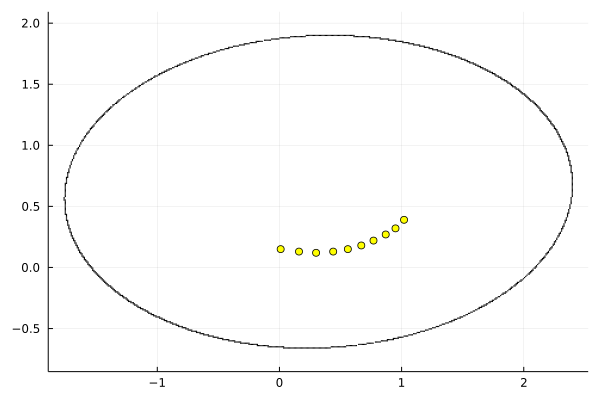

In [205]:
# Ahora queremos graficar los datos (x_i,y_i) juntos con la ecuación cuadrática definida por el parámetro beta

fNormal(x,y) = -x^2 + betaNormal[1]*y^2 + betaNormal[2]*x*y + betaNormal[3]*x + betaNormal[4]*y + betaNormal[4]
rNormal = Eq(fNormal,0)

plot(rNormal, aspect_ratio  = :equal, label = "Modelo Ecuaciones Normales", color = "blue")
scatter!(x,y, label = "Datos reales", color = "yellow")



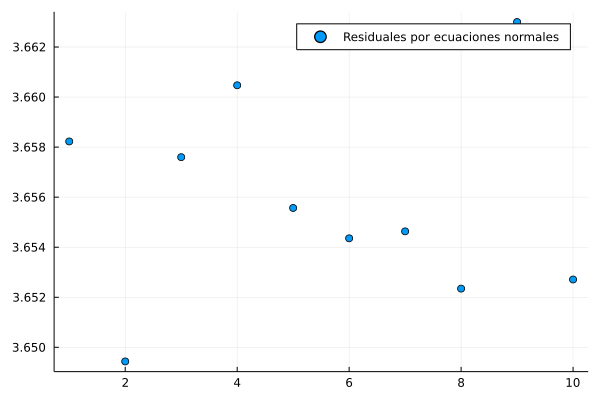

In [206]:
# Ahora calcularemos y graficaremos los residuales
fNormalResiduales = zeros(m)
t = [1; 2; 3; 4; 5; 6; 7; 8; 9; 10]

for i = 1:m
    fNormalResiduales[i] = fNormal(x[i],y[i])
end

scatter(t,fNormalResiduales, label = "Residuales por ecuaciones normales")

b) Encuentre ahora la órbita elíptica que mejor se ajuste utilizando el método de Gram-Schmidt para encontrar los coeficientes de la cuadrática y grafique la órbita calculada junto con las observaciones. Calcule también el valor del residual para este ajuste.

In [207]:
# Aquí vamos a guardar los vectores q
Q = Matrix(1.0*I,m,n)
# Aquí vamos a guardar los vectores v
V = Matrix(1.0*I,m,n)


V[:,1] = A[:,1]
Q[:,1] = V[:,1]/(norm(V[:,1]))
for j = 2:n
    V[:,j] = A[:,j]
    for i = 1:j-1
        V[:,j] = V[:,j]-(Q[:,i]'*A[:,j] )*Q[:,i]
    end
    Q[:,j] = V[:,j]/norm(V[:,j])
end

# Matriz R
R = Matrix(1.0*I,n,n)
for i = 1:n
   R[i,i] = norm(V[:,i]) 
end
for i = 1:n
    for j = i+1:n
        R[i,j] = Q[:,i]'*A[:,j]
    end
end

# Sin embargo, requerimos que Q sea cuadrada de mxm. 
# Para esto, consideramos el conjunto  { Q^1, Q^2, ... , Q^n, e_1, e_2,...e_m}
# A este conjunto le aplicamos el proceso de Gram Schmidt, descartando el vector w obtenido cuando este sea 
# igual a 0. 

# Bibliografía https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process
# https://math.stackexchange.com/questions/3647560/how-can-i-extend-a-set-to-an-orthogonal-basis
# Matriz de vectores canónicos
E = Matrix(1.0*I,m,m)
QExt = Matrix(1.0*I,m,m-n)
counter = 0
for i = 1:m
    w = E[:,i]
    for j = 1:n
        w = w - Q[i,j]*Q[:,j]
    end
    
    if i == 1
        if w == zeros(m) #si w es 0 es porque w pertenece al generado por q1,...,qn
            nothing
        else
            QExt[:,1] = w/norm(w)
            counter = counter + 1
        end
    elseif counter == m-n
        break
    else
        for j = 1:i-1
            w = w-QExt[i,j]*QExt[:,j]
        end
        
        if w == zeros(m)
            nothing
        else
            counter = counter + 1
            QExt[:,counter]  = w/norm(w)
        end
    end
end


QComplete = hcat(Q,QExt)

# También requerimos que R sea de 10x5. Para esto sólo le agregamos ceros a R en los últimos 5 = m-n renglones
RComplete = vcat(R, zeros(5,5))



# (QComplete,RComplete) es la factorización QR completa de A

10×5 Matrix{Float64}:
 0.210043  0.593336   1.9144    0.671873   2.38713
 0.0       0.0953456  0.635871  0.0362877  0.103084
 0.0       0.0        0.543359  0.21513    2.05118
 0.0       0.0        0.0       0.0488843  0.227921
 0.0       0.0        0.0       0.0        0.178053
 0.0       0.0        0.0       0.0        0.0
 0.0       0.0        0.0       0.0        0.0
 0.0       0.0        0.0       0.0        0.0
 0.0       0.0        0.0       0.0        0.0
 0.0       0.0        0.0       0.0        0.0

Ya que tenemos la factorización $QR$ completa, podemos resolver el problema de mínimos cuadrados. Recordemos que queremos resolver el problema
    \begin{align}
        A \beta = \begin{pmatrix}
            x_1^2 \\ x_2^2 \\ \vdots \\ x_{10}^2
        \end{pmatrix}
    \end{align}.
Como $ A = \hat{Q}\hat{R}$ y $\hat{Q}$ es ortogonal, entonces
    \begin{align}
        \hat{R} \beta = \hat{Q}^T \begin{pmatrix}
            x_1^2 \\ x_2^2 \\ \vdots \\ x_{10}^2
        \end{pmatrix}.
    \end{align}
Este es un sistema de 10 ecuaciones pero sólo nos interesan las primeras cinco. Como $\hat{R}$ es triangular superior, podemos resolver el sistema mediante sustitución hacia atrás.


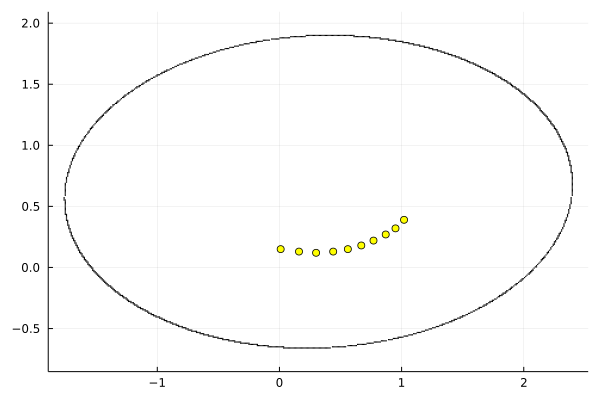

In [208]:
# Sólo nos van a interesar las primeras 5 coordenadas del producto QComplete^T*(x.*x)
w = QComplete'*(x .* x)
w = w[1:5]

betaGram = SolBwd(R,w)

# Ahora queremos graficar los datos (x_i,y_i) juntos con la ecuación cuadrática definida por el parámetro beta

fGram(x,y) = -x^2 + betaGram[1]*y^2 + betaGram[2]*x*y + betaGram[3]*x + betaGram[4]*y + betaGram[4]
rGram = Eq(fGram,0)

plot(rGram, aspect_ratio  = :equal, label = "Modelo Método de Gram-Schmidt", color = "blue")
scatter!(x,y, label = "Datos reales", color = "yellow")


c) Compare las gráficas y residuales producidas por ambos métodos y concluya.

# Pendiente

# U4 9

En un trabajo relacionado con el estudio de la eficiencia de la utilización de la energía por las larvas de la polilla modesta (Pachysphinx modesta), L. Schroeder [Schrl] utilizó los siguientes datos para determinar una relación entre $W$, el peso de las larvas vivas en gramos, y $R$, el consumo de oxígeno de las larvas en mililitros/hora. Por razones biológicas, se supone que entre $W$ y $R$ existe una relación de la forma $R = b W^a$.



\begin{array}{|c|c|c|c|c|c|c|c|} 
W & R & W & R & W & R & W & R  \\ 
0.017 & 0.154 & 0.211 & 0.366 & 3.040 & 3.590 & 0.233 & 0.537 \\ 
0.087 & 0.296 & 0.999 & 0.771 & 4.290 & 3.600 & 0.783 & 1.470 \\ 
0.174 & 0.363 & 3.020 & 2.010 & 5.300 & 3.880 & 1.350 & 2.480 \\ 
1.110 & 0.531 & 4.280 & 3.280 & 0.020 & 0.180 & 1.690 & 1.440 \\ 
1.740 & 2.230 & 4.580 & 2.960 & 0.119 & 0.299 & 2.750 & 1.840 \\ 
4.090 & 3.580 & 4.680 & 5.100 & 0.210 & 0.428 & 4.830 & 4.660 \\ 
5.450 & 3.520 & 0.020 & 0.181 & 1.320 & 1.150 & 5.530 & 6.940 \\ 
5.960 & 2.400 & 0.085 & 0.260 & 3.340 & 2.830 &  &  \\ 
0.025 & 0.23 & 0.171 & 0.334 & 5.480 & 4.150 &  &  \\ 
0.111 & 0.257 & 1.290 & 0.870 & 0.025 & 0.234 &  & 
\end{array}


a) Encuentre el polinomio logarítmico lineal de mínimos cuadrados
\begin{align}
\ln R = \ln b + a \ln W
\end{align}
utilizando el método de rotaciones de Givens.


**Solución:** 

Buscamos que
    \begin{align}
        \ln R_i & = \ln b + a \ln W_i \\
        & = \begin{pmatrix}
         1 & \ln W_i
        \end{pmatrix} \begin{pmatrix}
        \ln b \\ a
        \end{pmatrix}
    \end{align}
    
Por lo tanto, la matriz de diseño será la matriz de $37 \times 2$
    \begin{align}
        A = \begin{pmatrix} 
            1 & \ln W_1 \\
            1 & \ln W_2 \\
            \vdots \\
            1 & \ln W_{37}
        \end{pmatrix}
    \end{align}
y buscamos resolver el problema 
    \begin{align}
        A \beta = \ln R,
    \end{align}
donde
    \begin{align}
        \beta = \begin{pmatrix}
            \ln b \\
            a
        \end{pmatrix}
     \end{align}
y
    \begin{align}
        \ln R = \begin{pmatrix}
            \ln R_1 \\
            \ln R_2 \\
            \vdots \\
            \ln R_{37}
           \end{pmatrix}
     \end{align}


In [209]:
# Vectores de datos
# Peso de las larvas
W = [0.017; 0.087; 0.174; 1.110; 1.740; 4.090; 5.450; 5.960; 0.025; 
     0.111; 0.211; 3.040; 0.233; 0.999; 4.290; 0.783; 3.020; 5.300;
     1.350; 4.280; 0.020; 1.690; 4.580; 0.119; 2.750; 4.680; 0.210;
     4.830; 0.020; 1.320; 5.530; 0.085; 3.340; 0.171; 5.480; 1.290;
     0.025]
# Consumo de oxígeno en mililitros/hora
R = [0.154; 0.366; 3.590; 0.537; 0.296; 0.771; 3.600; 1.470; 0.363; 2.010; 
    3.880; 2.480; 0.531; 3.280; 0.180; 1.440; 2.230; 2.960; 0.299; 1.840;
    3.580; 5.100; 0.428; 4.660; 3.520; 0.181; 1.150; 6.940; 2.400; 0.260;
    2.830;  0.23; 0.334; 4.150; 0.257; 0.870; 0.234]

m = length(W)

# Matriz de diseño
A = ones(m,2)
A[:,2] = log.(W)

#ln R
Rlog = log.(R)

#Ahora necesitamos calcular la factorización QR de A mediante rotaciones de Givens.

# Esta función toma un vector x de nxn y dos índices i,j \leq n
# Regresa una matriz de rotación G tal que y = Gx tiene su j-ésima 
# entrada es igual a 0
function Givens(i,j,x)
    n = length(x)
    G = Matrix(1.0*I,n,n) 
    G[i,i] = x[i]/(sqrt(x[i]^2+x[j]^2))
    G[j,j] = G[i,i]
    G[j,i] = -x[j]/(sqrt(x[i]^2+x[j]^2))
    G[i,j] = -G[j,i]
    return(G)
end

# Esta función calcula la factorización QR de una matriz A mediante rotaciones de Givens
function QRGivens(A)
    (m,n) = size(A) 
    Q = Matrix(1.0*I,m,m)
    B = A
    for j = 1:n-1
        for i = m:-1:j+1
            x = B[:,j]
            T = Givens(j,i,x)  ### Estamos parados en la j-ésima columna y queremos hacer cero la i-ésima entrada (ver comentario de fnción Givens)
            B = T*B
            Q = T*Q
        end
    end
    Q = Q'
    R = B
    return(Q,R)
end

(Q, RComplete) = QRGivens(A)


# Ya que tenemos la factorización QR, la usamos para resolver el sistema de ecuaciones
# R* beta = Q^T ln(R)

beta = SolBwd(RComplete[1:2,1:2],(Q'*Rlog)[1:2,1])

lnb = beta[1]
a = beta[2]
b = exp(lnb)

println(a)
println(lnb)
println(b)

0.5072524246351425
0.2335109470838186
1.2630266542738828


De esta manera, 
    \begin{align}
        a & = 0.5072524246351425 \\
        \ln b & = 0.2335109470838186 \\
        b & = 1.2630266542738828
    \end{align}
Por lo tanto,
    \begin{align}
        R & = bW^a \\
        & = e^{0.2335109470838186} W^{0.5072524246351425}
    \end{align}

b) Calcule el error asociado a la aproxmación en la parte (a)

In [210]:
E = 0

for i = 1:37
    E = E + (R[i] - b*(W[i]^a) )^2
end

println(E)

148.40532603675385


c) Modifique la ecuación logarítmica de mínimos cuadrados de la parte (a), agregando el término cuadrático $c (\ln W_i)^2$, y después determine el polinomio logarítmico de mínimos cuadrados usando de nuevo el método de rotaciones de Givens. Calcule el error asociado a la aproximación.

**Solución:**

El polinomio logarítmico es de la forma
    \begin{align}
        \ln R = \ln b_2 + a_2 \ln W + c_2 (\ln W)^2.
    \end{align}
    
Ahora la matriz de diseño será de la forma
    \begin{align}
         A = \begin{pmatrix} 
            1 & \ln W_1 & (\ln W_1 )^2 \\
            1 & \ln W_2 & (\ln W_2 )^2 \\
            \vdots \\
            1 & \ln W_{37} & (\ln W_{37} )^2
        \end{pmatrix}
    \end{align}
y buscamos resolver el problema 
    \begin{align}
        A \gamma = \ln R,
    \end{align}
donde
    \begin{align}
        \gamma = \begin{pmatrix}
            \ln b_2 \\
            a_2 \\
            c_2
        \end{pmatrix}
     \end{align}
y
    \begin{align}
        \ln R = \begin{pmatrix}
            \ln R_1 \\
            \ln R_2 \\
            \vdots \\
            \ln R_{37}
           \end{pmatrix}
     \end{align}

In [211]:
# Matriz de diseño
A2 = ones(m,3)
A2[:,2] = log.(W)
A2[:,3] = (log.(W)).*(log.(W))

#ln R
Rlog = log.(R)

#Ahora necesitamos calcular la factorización QR de A mediante rotaciones de Givens.

# Esta función toma un vector x de nxn y dos índices i,j \leq n
# Regresa una matriz de rotación G tal que y = Gx tiene su j-ésima 
# entrada es igual a 0
function Givens(i,j,x)
    n = length(x)
    G = Matrix(1.0*I,n,n) 
    G[i,i] = x[i]/(sqrt(x[i]^2+x[j]^2))
    G[j,j] = G[i,i]
    G[j,i] = -x[j]/(sqrt(x[i]^2+x[j]^2))
    G[i,j] = -G[j,i]
    return(G)
end

# Esta función calcula la factorización QR de una matriz A mediante rotaciones de Givens
function QRGivens(A)
    (m,n) = size(A) 
    Q = Matrix(1.0*I,m,m)
    B = A
    for j = 1:n-1
        for i = m:-1:j+1
            x = B[:,j]
            T = Givens(j,i,x)  ### Estamos parados en la j-ésima columna y queremos hacer cero la i-ésima entrada (ver comentario de fnción Givens)
            B = T*B
            Q = T*Q
        end
    end
    Q = Q'
    R = B
    return(Q,R)
end

(Q2, R2Complete) = QRGivens(A2)

beta2 = SolBwd(R2Complete[1:3,1:3],(Q2'*Rlog)[1:3,1])
lnb2 = beta2[1]
a2 = beta2[2]
c2 = beta2[3]

b2 = exp(lnb2)

println(a2)
println(lnb2)
println(b2)
println(c2)

-0.6312731855589997
1.2406940191527989
3.4580125591043056
-0.363462897311612


De esta manera,
    \begin{align}
        a_2 & = -0.6312731855589997 \\
        b_2 & = 3.4580125591043056 \\
        c_2 & = -0.363462897311612
    \end{align}
y el modelo es 
    \begin{align}
        R = b W^a \exp ( c (\ln W)^2)
    \end{align}

In [212]:
Equad = 0
for i = 1:37
   Equad = Equad + ( R[i] - b2*(W[i]^a2)*exp(c2*(log(W[i])^2)))^2
end
println(Equad)

163.1474067643412


d) Agregue ahora un término cúbico a la ecuación logarítmica y determine el polinomio logarítmico de mínimos cuadrados con rotaciones de Givens. Calcule también el error y concluya.

El polinomio logarítmico ahora es de la forma
    \begin{align}
        \ln R = \ln b_3 + a_3 \ln W + c_3 (\ln W)^2 + d_3 (\ln W)^3.
    \end{align}
    
Ahora la matriz de diseño será de la forma
    \begin{align}
         A = \begin{pmatrix} 
            1 & \ln W_1 & (\ln W_1 )^2 & (\ln W_1)^3\\
            1 & \ln W_2 & (\ln W_2 )^2 & (\ln W_2)^3 \\
            \vdots & \vdots & \vdots & \vdots \\
            1 & \ln W_{37} & (\ln W_{37} )^2 & (\ln W_{37})^3
        \end{pmatrix}
    \end{align}
y buscamos resolver el problema 
    \begin{align}
        A \delta = \ln R,
    \end{align}
donde
    \begin{align}
        \delta = \begin{pmatrix}
            \ln b_3 \\
            a_3 \\
            c_3 \\
            d_3
        \end{pmatrix}
     \end{align}
y
    \begin{align}
        \ln R = \begin{pmatrix}
            \ln R_1 \\
            \ln R_2 \\
            \vdots \\
            \ln R_{37}
           \end{pmatrix}
     \end{align}

In [213]:
# Matriz de diseño
A3 = ones(m,4)
A3[:,2] = log.(W)
A3[:,3] = (log.(W)).*(log.(W))
A3[:,4] = (log.(W)).^3
#ln R
Rlog = log.(R)

#Ahora necesitamos calcular la factorización QR de A mediante rotaciones de Givens.

# Esta función toma un vector x de nxn y dos índices i,j \leq n
# Regresa una matriz de rotación G tal que y = Gx tiene su j-ésima 
# entrada es igual a 0
function Givens(i,j,x)
    n = length(x)
    G = Matrix(1.0*I,n,n) 
    G[i,i] = x[i]/(sqrt(x[i]^2+x[j]^2))
    G[j,j] = G[i,i]
    G[j,i] = -x[j]/(sqrt(x[i]^2+x[j]^2))
    G[i,j] = -G[j,i]
    return(G)
end

# Esta función calcula la factorización QR de una matriz A mediante rotaciones de Givens
function QRGivens(A)
    (m,n) = size(A) 
    Q = Matrix(1.0*I,m,m)
    B = A
    for j = 1:n-1
        for i = m:-1:j+1
            x = B[:,j]
            T = Givens(j,i,x)  ### Estamos parados en la j-ésima columna y queremos hacer cero la i-ésima entrada (ver comentario de fnción Givens)
            B = T*B
            Q = T*Q
        end
    end
    Q = Q'
    R = B
    return(Q,R)
end

(Q3, R3Complete) = QRGivens(A3)

#Ahora podemos encontrar delta como la solución del sistema triangular superior R \delta = Q^T*\ln R
delta = SolBwd(R3Complete[1:4,1:4],((Q3)'*Rlog)[1:4,1] )

lnb3 = delta[1] 
b3 = exp(lnb3)
a3 = delta[2] 
c3 = delta[3] 
d3 = delta[4]

Ecubic = 0
for i = 1:37
   Ecubic = Ecubic + ( R[i] - b3*(W[i]^a3)*exp(c3*(log(W[i])^2))*exp(d3*(log(W[i])^3)))^2
end

println(Ecubic)
println(E)
println(Equad)
println(Ecubic)

130.8219199816802
148.40532603675385
163.1474067643412
130.8219199816802


**Conclusión:** El modelo con término cúbico obtiene la mejor aproximación

# U4 10
Los siguientes datos representan las tasas de mortalidad (por cien mil) para las personas de edad 20-45, en Inglaterra
durante el siglo XX :

\begin{array}{cccc}
20-26 & 27-33 & 34-40 & 41-45 \\ 
431 & 499 & 746 & 956 \\ 
409 & 526 & 760 & 1014 \\ 
429 & 563 & 778 & 1076 \\ 
422 & 587 & 828 & 1134 \\ 
530 & 595 & 846 & 1024 \\ 
505 & 647 & 836 &  \\ 
459 & 669 & 916 & 
\end{array}

a) Usando ecuaciones normales, ajusta una línea a los daots y grafícala junto con los datos. ¿Crees que los datos están bien representados por una línea recta?

**Solución:**

Buscamos parámetros $a,b \in \mathbb{R}$ tales que
    \begin{align}
        M_i = a+bE_i
    \end{align}
para cada observación $(E_i,M_i)$ (esto es, suponemos que hay una relación lineal entre la edad de una persona y su riesgo de muerte). Entonces
    \begin{align}
        \begin{pmatrix}
            M_1 \\ M_2 \\ \vdots \\ M_{26}
        \end{pmatrix} = \begin{pmatrix}
            1 & E_1 \\
            1 & E_2 \\
            \vdots & \vdots \\
            1 & E_{26} 
        \end{pmatrix} \begin{pmatrix}
            a \\
            b
        \end{pmatrix}        
    \end{align}
Por lo tanto, la matriz de diseño es
    \begin{align}
        A = \begin{pmatrix}
            1 & E_1 \\
            1 & E_2 \\
            \vdots & \vdots \\
            1 & E_{26} 
        \end{pmatrix}
    \end{align}
y el problema a resolver es $A \beta  = M$, donde $\beta = \begin{pmatrix} a \\b \end{pmatrix}$. Las ecuaciones normales de este problema son
    \begin{align}
        A^T A \beta = A^T M
    \end{align}

In [214]:
# Vector de edades
E = LinRange(20,45,26)
#Vector de mortandad por edad
Mort = [431;409;429;422;530;505;459; 499; 526; 563; 587; 595; 647; 669; 746;
    760; 778; 828; 846; 836; 916; 956;  1014; 1076; 1134; 1024]

m = length(E)
# Matriz de diseño
A = ones(m,2)
A[:,2] = E

# Encontramos la factorización de Cholesky de A^T*A: A^T*A = L*L^T
(L,LT) = FacChol(A'*A)

# Resolvemos el sistema Lw = A^T M por sustitución hacia adelante
w0 = SolFwd(L,A'*Mort)

# Resolvemos el sistema L^T beta = w0 por sustitución hacia atrás
beta = SolBwd(LT,w0)

a = beta[1]
b = beta[2]

println(a)
println(b)

-234.1658119658138
28.72581196581202


Por lo tanto, el modelo lineal está dado por
    \begin{align}
        M = -234.1658119658138 + 28.72581196581202 E
    \end{align}

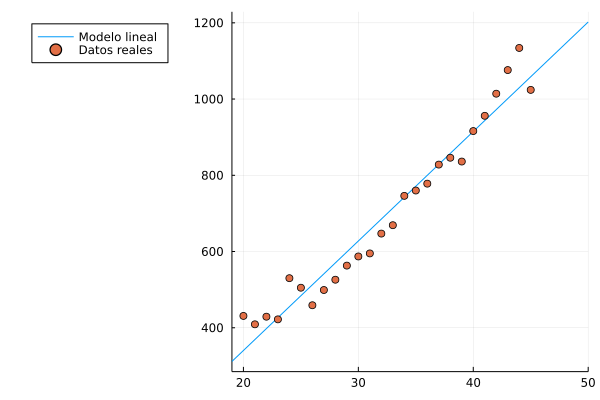

In [215]:
# Ahora graficamos el modelo obtenido junto con los datos reales
plot(x -> a+b*x, xlims = (19,50), labels = "Modelo lineal", legend = :outertopleft)
#scatter!(E,Residuales1, labels = "Residuales", color = "yellow")
scatter!(E, Mort, labels = "Datos reales")

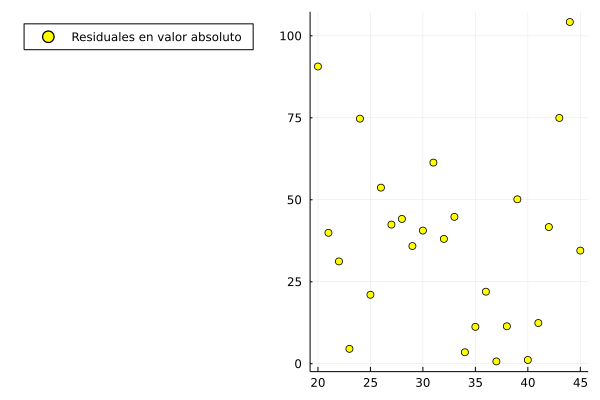

In [216]:
#Residuales
ResidualesA = Mort .- ( a.*ones(m)+b.*E )
#Gráfica de los valores absolutos de los residuales
scatter(E,abs.(ResidualesA), labels = "Residuales en valor absoluto", color = "yellow", legend = :outertopleft)

Notemos que, en general, el modelo lineal no ajusta bien los datos reales. Aunque hay algunos grupos de edad en los que el ajuste es relativamente bueno, como por ejemplo  en el rango de edad entre 35 y 40 y en el rango entre 20 y 25. En grupos como 25-30 y 40-45 el ajuste es notablemente peor.

b) El argumento sugiere que los datos pueden ser representados por diferentes líneas en los intervalos de edad $[20,28]$, $[28,39]$ y $[39,45]$. Ajuste tres líneas; es decir, para los datos de cada intervalo, y colócalas en el mismo gráfico. Se pueden determinar los ajustes de los datos de cada subrango con plena independencia, ya que no hemos hecho ninguna hipótesis sobre las relaciones entre estas líneas.

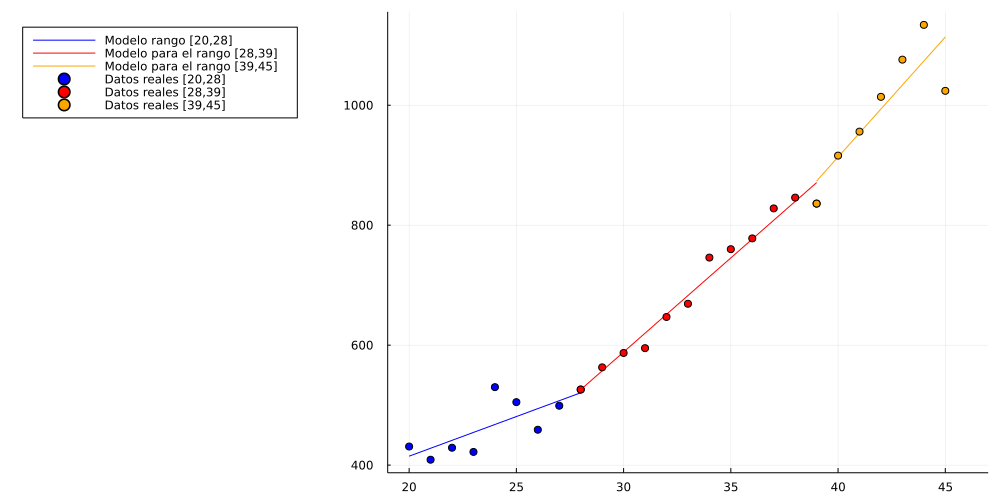

In [217]:
# Para cada rango de edad necesitaremos una matriz de diseño distinta: B_1, B_2, B_3

# Matriz para el rango [20,28]
E1 = E[1:9]
M1 = Mort[1:9]
B1 = ones(9,2)   
B1[:,2] = E1 ### B1 es la matriz de diseño para este rango

# Encontramos la factorización de Cholesky L1 U1 = B1^T *B1.
# Posteriormente, encontramos la solución w1 al sistema L1*w = B1^T * M1 por sustitución hacia adelante
# Finalmente, encontramos la solución beta1 al sistema U1 * beta = w1 por sustitución hacia atrás
(L1,U1) = FacChol(B1'*B1)
w1 = SolFwd(L1,B1'*M1)
beta1 = SolBwd(U1,w1)


# Matriz para el rango [28,39]
E2 = E[9:20]
M2 = Mort[9:20]
B2 = ones(12,2)
B2[:,2] = E2

# Encontramos la factorización de Cholesky L2 U2 = B2^T *B2.
# Posteriormente, encontramos la solución w2 al sistema L2*w = B2^T * M2 por sustitución hacia adelante
# Finalmente, encontramos la solución beta2 al sistema U2 * beta = w2 por sustitución hacia atrás
(L2,U2) = FacChol(B2'*B2)
w2 = SolFwd(L2,B2'*M2)
beta2 = SolBwd(U2,w2)




#Matriz para el rango [39,45]
E3 = E[20:26]
M3 = Mort[20:26]
B3 = ones(7,2)
B3[:,2] = E3

# Encontramos la factorización de Cholesky L3 U3 = B3^T *B3.
# Posteriormente, encontramos la solución w3 al sistema L3*w = B3^T * M3 por sustitución hacia adelante
# Finalmente, encontramos la solución beta3 al sistema U3 * beta = w3 por sustitución hacia atrás
(L3,U3) = FacChol(B3'*B3)
w3 = SolFwd(L3,B3'*M3)
beta3 = SolBwd(U3,w3)


function Modelo1(x)
    if x < 20
        return(0)
    elseif 20 <= x < 28
        nothing
    end
end


################ Gráficas
plot(E1, beta1[1] .+ beta1[2].* E1 , label = "Modelo rango [20,28]", color = "blue", legend = :outertopleft, size = (1000,500), xlims = (19,47))
plot!(E2, beta2[1] .+ beta2[2].*E2, label = "Modelo para el rango [28,39]", color = "red")
plot!(E3, beta3[1] .+ beta3[2].*E3, label = "Modelo para el rango [39,45]", color = "orange")
scatter!(E1, M1, label = "Datos reales [20,28]", color = "blue")
scatter!(E2, M2, label = "Datos reales [28,39]", color = "red")
scatter!(E3, M3, label = "Datos reales [39,45]", color = "orange")

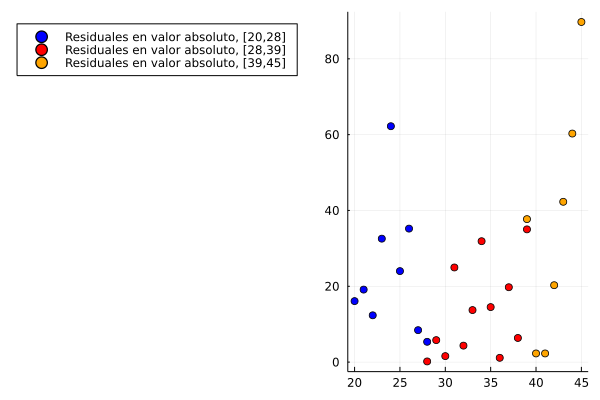

In [218]:
# Residuales1
Residuales1 = M1 .- ( beta1[1] .* ones(9) + beta1[2].*E1 )
# Residuales2
Residuales2 = M2 .- ( beta2[1] .* ones(12) + beta2[2].*E2 )
# Residuales3
Residuales3 = M3 .- ( beta3[1] .* ones(7) + beta3[2].*E3 );

scatter(E1,abs.(Residuales1), labels = "Residuales en valor absoluto, [20,28]", color = "blue", legend = :outertopleft)
scatter!(E2, abs.(Residuales2), labels = "Residuales en valor absoluto, [28,39]", color = "red")
scatter!(E3, abs.(Residuales3), labels = "Residuales en valor absoluto, [39,45]", color = "orange")

c) El ajuste en b) puede no ser continuo en 28 o 39ñ. Una manera de forzar la continuidad es elegir que la función del modelo tenga esta propiedad, para ello es necesario definir funciones básicas que garanticen la continuidad. Las cuatro funciones que sugeriomos que se utilicen están representadas en la figura 1 y se nombran $l_i(x)$, $i =1,2,3,4$. Cada una de estas es definida y continua en $20 \leq x \leq 45$, por lo que cualquier combinación lineal de estas debe serlo. Utilizando estas funciones básicas, resuelve el problema de mínimos cuadrados. Grafica la solución junto a los ajustes realizacdos en a) y b). ¿Cuál de estos tres produce el mejor ajuste?

In [219]:
#Definición de las funciones l_i (x)

function l1(x)
    if x <= 28
        return( -(1/8)*(x-20)+1)
    else
        return(0)
    end
end

function l2(x)
    if x <= 28
        return(  (1/8)*(x-20) )
    elseif 28 < x <= 39
        return(  -(1/11)*(x-39) )
    else
        return(0)
    end
end

function l3(x)
    if x <= 28
        return(0)
    elseif 28 < x <= 39
        return( (1/11)*(x-28))
    else
        return( -(1/6)*(x-45))
    end        
end

function l4(x)
    if x <= 39
        return(0)
    else
        return( (1/6)*(x-39))
    end
end




l4 (generic function with 1 method)

Ahora buscamos coeficientes $a,b,c,d \in \mathbb{R}$ tales que
    \begin{align}
        M_i = a l_1 (E_i) + b l_2 (E_i) + cl_3 ( E_i) + d l_4(E_i)
    \end{align}
para todas las observaciones $(E_i,M_i)$; es decir,
    \begin{align}
        \begin{pmatrix}
            l_1 (E_1) & l_2 (E_1) & l_3 (E_1) & l_4 (E_1) \\
            \vdots & \vdots & \vdots & \vdots \\
            l_1 (E_{26}) & l_2 (E_{26}) & l_3 (E_{26}) & l_4 (E_{26}) 
        \end{pmatrix} \begin{pmatrix}
        a \\ b \\ c \\ d
        \end{pmatrix} = \begin{pmatrix}
        M_1 \\ \vdots \\ M_{26}
        \end{pmatrix}
    \end{align}.
Por lo tanto, la matriz de diseño está dada por $ A = (l_i (E_j))_{ij}$ y el vector de parámetros está dado por $\gamma = \begin{pmatrix} a \\ b \\ c \\ d \end{pmatrix}$. El problema a resolver es $A \gamma = M$ y las ecuaciones normales de este problema son:
    \begin{align}
        A^T A \gamma = A^T M
    \end{align}

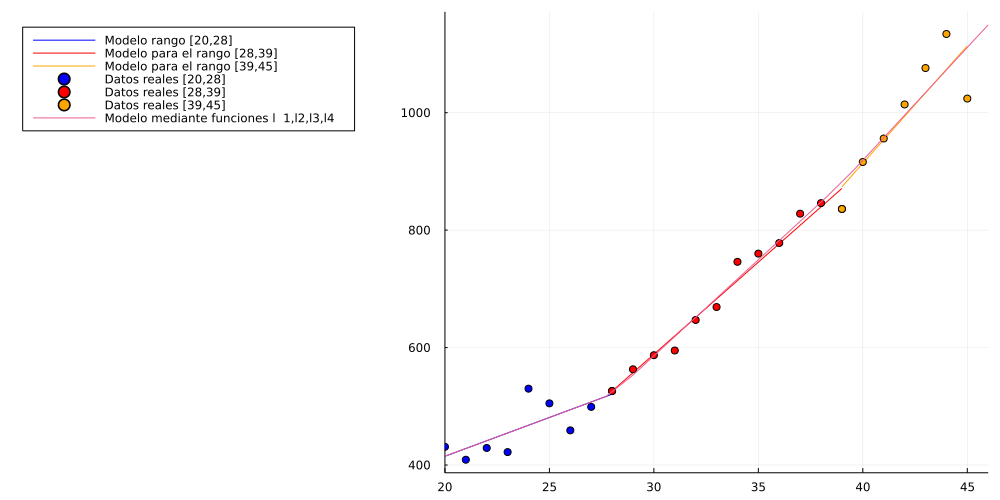

In [220]:
# Matriz de diseño
A = zeros(m,4)
A[:,1] = l1.(E)
A[:,2] = l2.(E)
A[:,3] = l3.(E)
A[:,4] = l4.(E)

# Factorización de Cholesky de A^T A

(L4,U4)  = FacChol(A'*A)

# Resolvemos el sistema L4w = A^T M por sustitución hacia adelante
u0 = SolFwd(L4,A'*Mort)

# Resolvemos el sistema U4 beta = u0 por sustitución hacia atrás
gamma = SolBwd(U4,u0)

# Función modelo
phi(x) = gamma[1]*l1(x) + gamma[2]*l2(x) + gamma[3]*l3(x) + gamma[4]*l4(x)

# Gráficas inciso b
plot(E1, beta1[1] .+ beta1[2].* E1 , label = "Modelo rango [20,28]", color = "blue", legend = :outertopleft, size = (1000,500), xlims = (19,47))
plot!(E2, beta2[1] .+ beta2[2].*E2, label = "Modelo para el rango [28,39]", color = "red")
plot!(E3, beta3[1] .+ beta3[2].*E3, label = "Modelo para el rango [39,45]", color = "orange")
scatter!(E1, M1, label = "Datos reales [20,28]", color = "blue")
scatter!(E2, M2, label = "Datos reales [28,39]", color = "red")
scatter!(E3, M3, label = "Datos reales [39,45]", color = "orange")
#Grafica modelo funciones l1,l2,l3,l4
plot!(phi, xlims = (20,46), label = "Modelo mediante funciones l  1,l2,l3,l4")




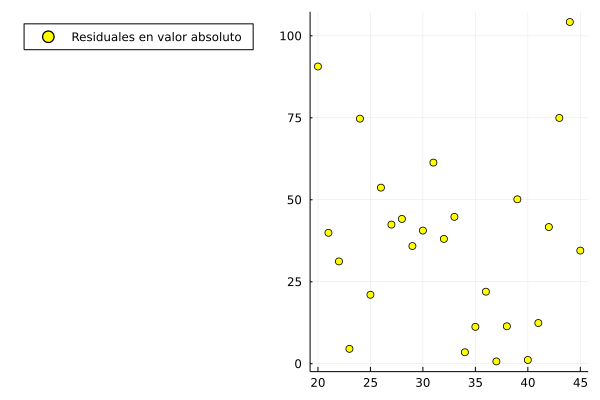

In [221]:
# Residuales inciso a
scatter(E,abs.(ResidualesA), labels = "Residuales en valor absoluto", color = "yellow", legend = :outertopleft)

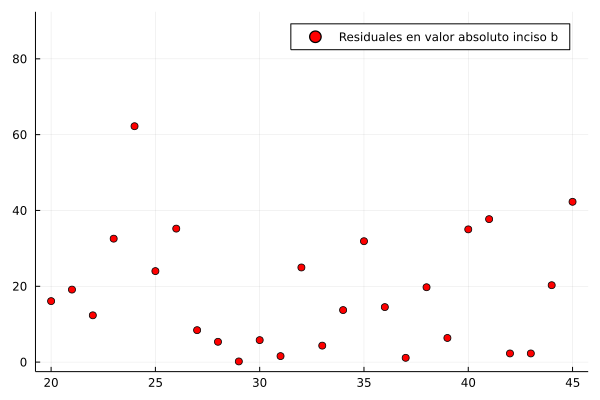

In [222]:
#NuevosResiduales
NuevosResiduales = Mort .- phi.(E)

#Residuales inciso b
ResidualesB = vcat(Residuales1,Residuales2,Residuales3)

scatter(E, abs.(ResidualesB), label = "Residuales en valor absoluto inciso b", color = "red")
#scatter(E, abs.(NuevosResiduales), label = "Residuales en valor absoluto inciso c", color = "blue")

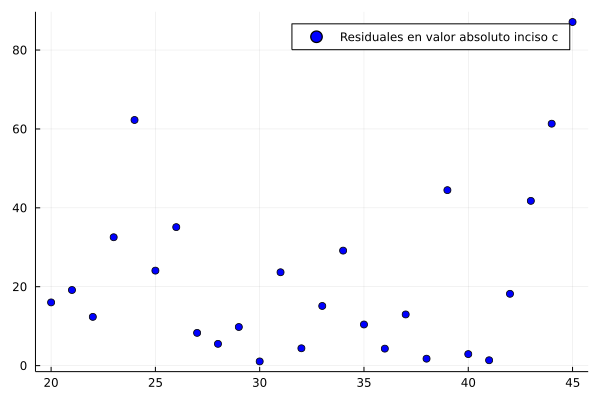

In [223]:
# Residuales inciso c
scatter(E, abs.(NuevosResiduales), label = "Residuales en valor absoluto inciso c", color = "blue")

# U4 11

En los laboratorios de física de partículas de la UNAM se hacen bombardeos con rayos láser sobre cierto tipo de partículas para determiar su posición en un cierto espacio. Al hacer el bombaerdeo, el láser despliega un haz de luz cuando hace contacto con la partícula. Sin embargo, debido a las unidades tan pequeñas que se manejan, en ocasiones hay errores en la medición. Un equipo de estudio recolectó los siguientes datos de las posiciones de los haces de luz al hacer el bombardeo sobre una determinada partícula (los datos están dados en micras):
\begin{array}{ccc}
x & y & z \\ 
0.26 & 1.9 & 3.6 \\
0.23 & 1.92 & 7  \\
0.255 & 4.5 & 3.52 \\
0.27 & 4.42 & 7.1 \\
2.74 & 1.92 & 3.53 \\
2.75 & 1.92 & 6.99 \\
2.77 & 4.4 & 3.56 \\ 
2.74 & 4.45 & 7.056 \\  
0.25 & 3.3 & 5.9 \\  
2.7 & 3.2 & 5.82 \\  
1.6 & 1.93 & 5.8 \\ 
1.5 & 4.5 & 5.75  
\end{array}

Con el fin de enconctrar las coordenadas de la partícula requerida, se requiere ajustarla a una forma esférica.

# a)

Dada la ecuación  de una esfera:
    \begin{align}
        (x-a)^2+(y-b)^2+(z-c)^2 = r^2,
     \end{align}
expanda la expresión, de tal forma que le quede un polinomio cuadrático en $x,y,z$.

Solución:
   \begin{align}
        r^2 & = (x-a)^2+(y-b)^2+(z-c)^2 \\
        & = (x^2-2ax+a^2) + (y^2-2by+b^2) + (z^2-2cz+c^2 ) \\
        &  = x^2 +y^2 + z^2 -2ax-2by-2cz +(a^2+ b^2+c^2)
    \end{align}
    
Por lo tanto, las coordenadas $(x,y,z)$ satisfacen la ecuación cuadrática
    \begin{align}
        x^2 +y^2 + z^2 -2ax-2by-2cz +(a^2+ b^2+c^2)-r^2 = 0.
    \end{align}
    
Esta es una ecuación polinomial cuadrática con cuatro parámetros: $a,b,c,r$.




# b) 

Con el fin de que ajuste los datos proporcionados a una esfera, utilice la expansión encontrada para plantear el sistema de ecuaciones a resolver, de tal forma que las incógnitas del sistema sean los valores $a,b,c,d$ ($d$ será un valor que combine a $r$ y a los otros tres valores.

Solución: 

Queremos que los datos proporcionados satisfagan una ecuación de la forma
    \begin{align}
        x^2+y^2+z^2 = 2ax + 2by + 2cz -d,
    \end{align}
donde
    \begin{align}
        d = a^2+b^2+c^2-r^2.
    \end{align}
Por lo tanto, el sistema que queremos resolver está dado por
    \begin{align}
       \begin{pmatrix}
        2x_1 & 2y_1 & 2z_1 & -1 \\
        \vdots & \vdots & \vdots & \vdots \\
        2x_{12} & 2y_{12} & 2z_{12} & -1
        \end{pmatrix} \begin{pmatrix}
        a \\ b \\ c \\ d \end{pmatrix}
        = \begin{pmatrix}
            x_1^2+y_1^2+z_1^2 \\
            \vdots \\
            x_{12}^2+y_{12}^2+z_{12}^2
        \end{pmatrix} 
    \end{align}
(las incógnitas son $a,b,c,d$).    

# c)

Resuelva el problema de los mínimos cuadrados utilizando reflexiones de Householder y obtenga los valores de $a,b,c,d,r$. ¿Cómo queda la ecuación de la esfera calculada?

In [224]:
# Datos proporcionados
x = [0.26; 0.23; 0.255; 0.27; 2.74; 2.75; 2.77; 2.74; 0.25; 2.7; 1.6; 1.5]
y = [ 1.9; 1.92; 4.5; 4.42; 1.92; 1.92; 4.4; 4.45; 3.3; 3.2; 1.93; 4.5]
z = [3.6; 7; 3.52; 7.1; 3.53; 6.99; 3.56; 7.056; 5.9; 5.82; 5.8; 5.75]

m = length(x)

# Matriz de diseño
A = ones(m,4)
A[:,1] = 2 .* x
A[:,2] = 2 .* y
A[:,3] = 2 .* z
A[:,4] = (-1) .* A[:,4]

# Funciones que automatizan el algoritmo de Householder

#Esta función toma como argumento una matriz A y regresa la matriz de Householder H tal que
# HA es una matriz cuya primera columna tiene puros ceros debajo de la diagonal
function Householder(A)
    (m,n)=size(A)

    x = A[:,1]

    e1 = zeros(m)
    e1[1] = 1.0

    v = x+sign(A[1,1])*norm(x)*e1
    v = v/norm(v)

    H = I -2*v*v'
end

#Esta función toma como argumento una matriz A de mxn. Regresa una tupla (Q,R) donde Q es una matriz ortogonal y
# R es una matriz triangular superior tales que QR = A.
function QRHouseholder(A)
    (m,n) = size(A)
    Q = Matrix(1.0*I,m,m)
    R = A

    for i = 1:n
        HTild = Householder(R[i:m,i:n] )
    
        H = Matrix(1.0*I,m,m)
        H[i:m,i:m] = HTild
    
        R = H*R
        Q = H*Q
    end
    Q = Q'
    return(Q,R)
end

(Q,R) = QRHouseholder(A)

# Queremos resolver el sistema A  \beta =  w, donde beta = (a,b,c,d) y w = (x_i^2+y_i^2+z_i^2).
# Como A = QR, entonces esto es equivalente al sistema triangular superior R \beta = Q^T * w

w = (x .* x) +  (y .* y) + (z .* z)

# Realmente sólo nos interesan las primeras cuatro ecucaciones del sistema, el cual podemos resolver por
# sustitución hacia atrás.
beta0 = SolBwd(R[1:4,1:4], (Q'*w)[1:4])

# Parámetros de la esfera:
a = beta0[1]
b = beta0[2]
c = beta0[3]
d = beta0[4]
r = sqrt(a^2+b^2+c^2 -d)

println(a)
println(b)
println(c)
println(d)
println(r^2)

1.4738557255799651
3.194365228040964
5.168685219427065
34.28340159006233
4.808125217403521


La ecuación de la esfera queda de la siguiente forma
    \begin{align}
        (x- 1.4738557255799651)^2 + (y-3.194365228040964)^2+ (z- 5.168685219427065)^2 = 4.808125217403521
    \end{align}

# Unidad 5

# U5 1

Dada una matriz $A \in \mathbb{R}^{n \times n}$, demuestre que si $X$ es una matriz cuadrada no singular entonces $A$ y $X^{-1} A X$ tienen el mismo polinomio característico.

**Demostración:**

Usaremos que la función  $B \mapsto \det(B)$ es multiplicativa. Sean $p_1,p_2$ los polinomios característicos de $A$ y $X^{-1}AX$, respectivamente. Entonces
		\begin{align}
			p_2 (t) & = \det ( X^{-1}AX - tI) \\
			& = \det( X^{-1} ( AX - t X)) \\
			& = \det( X^{-1} ( A - tI) X) \\
			& = \det (X^{-1}) \det (A -tI) \det(X) \\
			& = \frac{1}{\det (X)} \det (A-tI) \det( X) \\
			& = \det (A-tI) \\
			&  = p_1 (t).
		\end{align}
		
Por lo tanto, $A$ y $X^{-1}AX$ tienen el mismo polinomio característico.
    
# U5 2

Dada una matriz $A \in \mathbb{R}^{n \times n}$ y sus respectivos valores propios $\lambda_1, \dots ,\lambda_n$, demuestre que
    \begin{align}
		\det (A ) = \prod _{j=1}^n \lambda_j.
    \end{align}
    
**Demostración:**

Recordemos que $A$ es diagonalizable sobre el campo de los complejos, por lo que existe una matriz invertible $N$ con coeficientes complejos tal que
			\begin{align}
				N^{-1}AN = D,
			\end{align}
		donde
			\begin{align}
				D  = diag(\lambda_1, \dots, \lambda_n).
			\end{align}
			
Usaremos que la función $B \mapsto \det (B)$ es multiplicativa:
			\begin{align}
				\det (D) & = \det ( N^{-1}) \det (A) \det (N) \\
				& = \frac{1}{\det(N)} \det (A) \det (N) \\
				& = \det (A).
			\end{align}
		Por lo tanto, 
			\begin{align}
				\det (A) & =   \det(D) \\
				& = \prod_{j=1}^n \lambda_j,
			\end{align}
		donde la última igualdad se da porque el determinante de una matriz diagonal es igual al producto de las entradas de su diagonal.
        
       

# U5 3

# Pendiente

# U5 4

**Método de Newon para cálculo de valores y vectores propiosMétodo de Newon para cálculo de valores y vectores propios.**

Resuelva el ejercicio 5.29 de la página 254 del libro Scientific computing, an introdutory survey de M. Heath.

Tomamos una matriz $A$ de $n \times n$. Definimos la función $f \colon \mathbb{R}^{n+1} \to \mathbb{R}^{n+1}$ como
    \begin{align}
        f(x,\lambda) = \begin{bmatrix} Ax - \lambda x \\ x^T x-1 \end{bmatrix}
    \end{align}
Entonces el método de Newton para resolver la ecuación $f(x,\lambda)=0$ toma la forma
    \begin{align}
        \begin{bmatrix} 
            x_{k+1} \\
            \lambda_{k+1}
        \end{bmatrix}
        = \begin{bmatrix}
            x_k \\ \lambda_k
        \end{bmatrix} + \begin{bmatrix}
            s_k \\ \delta_k
        \end{bmatrix},
    \end{align}
donde $\begin{bmatrix} s_k & \delta_k \end{bmatrix}^T$ es la solución del sistema de ecuaciones
    \begin{align}
        \begin{bmatrix}
            A - \lambda_k I & -x_k \\
            2 x_k^T & 0
        \end{bmatrix}
        \begin{bmatrix}
            s_k \\ \delta_k
        \end{bmatrix}
        & = - \begin{bmatrix}
            Ax_k - \lambda_k x_k \\
            x_k^T x_k -1
        \end{bmatrix}
    \end{align}




In [225]:
# Implementación del método de Newton

# Usaremos el método de Householder para calcular la factorización QR del jacobiano

#Esta función toma como argumento una matriz A y regresa la matriz de Householder H tal que
# HA es una matriz cuya primera columna tiene puros ceros debajo de la diagonal
function Householder(A)
    x = A[:,1]

    e1 = zeros(size(A)[1])
    e1[1] = 1.0

    v = x+sign(A[1,1])*norm(x)*e1
    v = v/norm(v)

    H = I -2*v*v'
end

#Esta función toma como argumento una matriz A de mxn. Regresa una tupla (Q,R) donde Q es una matriz ortogonal y
# R es una matriz triangular superior tales que QR = A.
function QRHouseholder(A)
    (m,n) = size(A)
    Q = Matrix(1.0*I,size(A)[1],size(A)[1])
    R = A

    for i = 1:size(A)[2]
        HTild = Householder(R[i:size(A)[1],i:size(A)[2]] )
    
        H = Matrix(1.0*I,size(A)[1],size(A)[1])
        H[i:size(A)[1],i:size(A)[1]] = HTild
    
        R = H*R
        Q = H*Q
    end
    Q = Q'
    return(Q,R)
end

# Tomamos como input una matriz A de nxn



# Definimos la función f. x debe ser un vector de nx1 y y debe ser un número real
function f(x,y)
    n = length(x)
    B = zeros(n+1)
    B[1:n] = A*x-y*x
    B[n+1] = x'*x - 1
    return(B)
end


A = [1 0 0; 0 5 0; 0 0 9]
(n,m) = size(A)

# Aproximación inicial
x0 = [1; -1; 1]
x0 = x0/norm(x0)

lambda0 = (x0)'*A*(x0)

# Máximo de iteraciones
nit = 1000

# Tolerancia. El algortimo se detiene cuando norm( f( x_k, lambda_k) < tol
tol = 10.0^(-16)

xk = x0
lambdak = lambda0

C = zeros(n+1,n+1)
c = zeros(n+1)

for i = 1:nit
    if norm( f(xk,lambdak) ) <= tol
        println(i)
        break
    else
        # Consideramos el siguiente sistema de ecuacions C [sk;deltak] = c
        C[1:n,1:n] = A-lambdak*I
        C[1:n,n+1] = -(xk)
        C[n+1,1:n] = 2*(xk)'
    
        c[1:n] = -(A*xk - lambdak*xk )
        c[n+1] = -( ( (xk)'*xk )-1 )
    
        #Calculamos la factorización QR de C
        (Q,R) = QRHouseholder(C)
    
        #Resolvemos el sistema de (n+1) x (n+1):  R [s, delta] = Q'*c por sustitución hacia atrás
        SDelta = SolBwd(R, Q'*c)
    
        xk = xk + SDelta[1:n]
        # Normalizamos a xk
        xk = xk/norm(xk)
        lambdak = lambdak + SDelta[n+1]
    end        
end


# Implementación del método de la potencia normalizada 

# Tomamos como input una matriz A de nxn y una aproximación inicial no nula
A = [1 0 0; 0 5 0; 0 0 9]
x0 = [1; -1; 1]
x0 = x0/norm(x0)
# Máximo número de iteraciones y tolerancia
nit = 1000000
tol = 10.0^(-16)
xk = x0
lambdak = 0

for i = 1:nit
    if norm((A-lambdak*I)*xk)<= tol
        print(i)
        break
    else
        # Este índice es para encontrar la aproximación actual de lambda. Se define
        # k0 de esta forma para evitar tomar una entrada de xk igual a 0 (o muy cercana a 0)
        k0 = findfirst(a -> a == maximum( abs.(xk) ), abs.(xk))
        lambdak = (A*xk)[k0]/xk[k0]
        xk = A*xk  
        xk = xk/norm(xk)
    end
end


3
67

# U5 4
Muestre que los valores propios de una matriz simétrica con coeficientes reales de $ 2 \times 2$ son reales. ¿Cómo quedaría el resultado en general para una matriz simétrica con coeficientes en los reales de $n \times n$?

**Demostración:**

Demostraré directamente que el resultado es cierto para matrices simétricas de $n \times n$ con coeficientes reales. Esta demostración se basa en el hecho de que una matriz simétrica con coeficientes reales es autoadjunta. Probaré este hecho:
	
Consideremos el siguiente producto hermitiano en $\mathbb{C}^n$:
	\begin{align}
	 \langle x, y \rangle & =  \sum_{j=1}^n x_j \overline{y_j}.
	\end{align}

Entonces
		\begin{align}
			\langle Ax, y \rangle & = \sum_{j=1}^n (Ax)_j \overline{y_j} \\
			& = \sum_{j=1}^n (A_j \cdot x) \overline{y_j} \\
			& = \sum_{j=1}^n  \left( \sum_{k=1}^n A_{jk} x_k \right) \overline{y_j} \\
			&  = \sum_{j=1}^n   \sum_{k=1}^n x_k  \overline{A_{jk} y_j} \;\;\;\; \text{ aquí se usa que} \;\; A \in \mathbb{R}^{n \times n} \\
			&   = \sum_{j=1}^n   \sum_{k=1}^n x_k  \overline{A_{kj} y_j} \;\;\;\; \text{ aquí se usa que A es simétrica}\\
			& = \sum_{k=1}^n   \sum_{j=1}^n x_k  \overline{A_{kj} y_j} \\
			& = \sum_{k=1}^n  x_k  \sum_{j=1}^n   \overline{A_{kj} y_j} \\
			& = \sum_{k=1}^n  x_k \overline{ (Ay)_k } \\
			& = \langle x, Ay \rangle
		\end{align}
        
Por lo tanto, $A$ es autoadjunta. De esta manera, consideremos un valor propio   $\lambda \in \mathbb{C}$ de $A$ con un vector propio asociado $w \in \mathbb{C}^n \setminus \{ 0 \}$ . Entonces
		\begin{align}
			\lambda |w|^2 & = \lambda \langle w,w  \rangle \\
			& = \langle \lambda w ,w \rangle \\
			& =  \langle Aw,w \rangle \\
			& = \langle w,Aw \rangle \\
			& = \langle w, \lambda w \rangle \\
			& = \overline{\lambda} \langle w,w \rangle \\
			& = \overline{\lambda} |w|^2.
		\end{align}
	Como $w \neq 0$, se sigue que $\lambda = \overline{\lambda}$. Por lo tanto, $\lambda \in \mathbb{R}$, como buscábamos probar.
    
# U5 6

Calcule la descomposición de Schur de la matriz
	\begin{align}
		A = \begin{pmatrix}
			1 & 2 \\
			2 & 3
		\end{pmatrix}
	\end{align}
**Solución:** 

Primero calculamos el polinomio característico de $A$:
	\begin{align}
		p(t) & = t^2-tr A t+\det A \\
		&  = t^2 -4t-1 \\
		& = \left (t- \left(2+\sqrt{5} \right) \right) \left( t-\left(2-\sqrt{5}\right) \right)
	\end{align}
	
Para encontrar un valor propio asociado a $\lambda_1 = 2+\sqrt{5}$, resolvemos el sistema
		\begin{align}
			0 & = (A-\lambda_1 I) v \\
			& = \begin{pmatrix}
				-1 - \sqrt{5} & 2 \\
				2 & 1-\sqrt{5}
			\end{pmatrix} \begin{pmatrix}
			x \\ y
			\end{pmatrix} \\
			& = \begin{pmatrix}
				-(1+\sqrt{5}) x +2y \\
				2x +(1-\sqrt{5})y
			\end{pmatrix}.
		\end{align}
	Las dos ecuaciones de este sistema son equivalentes, por lo que nos podemos deshacer de la segunda y obtenemos
		\begin{align}
			y = \frac{1+\sqrt{5}}{2} x.
		\end{align}
	Haciendo $x=2$, obtenemos el vector propio
		\begin{align}
			v = \begin{pmatrix}
				2 \\ 1+\sqrt{5}
			\end{pmatrix}
		\end{align}

Para obtener un vector propio asociado a $\lambda_2 = 2-\sqrt{5}$ basta conjugar $v$ respecto a $\sqrt{5}$, obteniendo 
		\begin{align}
			w = \begin{pmatrix}
			2 \\
			1-\sqrt{5}
			\end{pmatrix}
		\end{align}
	
Notemos que (afortunadamente), $v$ y $w$ ya son ortogonales, por lo que para obtener una base ortonormal para $\mathbb{R}^2$ compuesta por vectores propios de $A$ basta normalizar a $v$ y $w$. Definimos
		\begin{align}
			u_1 & = \frac{u}{||u||} = \frac{1}{\sqrt{10+2\sqrt{5}}} \begin{pmatrix}
			2 \\ 1+\sqrt{5}
			\end{pmatrix} \\
			 u_2 & = \frac{w}{||w||} = \frac{1}{\sqrt{ 10-2\sqrt{5} } } \begin{pmatrix} 2 \\ 1- {\sqrt{5}}
			 \end{pmatrix} 
		\end{align}
	De esta forma, si consideramos
		\begin{align}
			Q = \begin{pmatrix}
				u_1 & u_2
			\end{pmatrix}
			= \begin{pmatrix}
			\frac{2}{\sqrt{10+2\sqrt{5}}} &  \frac{2}{\sqrt{ 10-2\sqrt{5} }} \\
			\frac{1+\sqrt{5}}{\sqrt{10+2\sqrt{5}}} & \frac{1- \sqrt{5}}{\sqrt{ 10-2\sqrt{5} }}
			\end{pmatrix}
		\end{align}
	y 
		\begin{align}
			D = \begin{pmatrix}
					2+ \sqrt{5} & 0 \\
					0 & 2- \sqrt{5}
			\end{pmatrix}
		\end{align}
	entonces
		\begin{align}
			A = Q D Q^T,
		\end{align}
	esta es la factorización de Schur de $A$.

# U5 7

Suponga que $A_0 \in \mathbb{R}^{n \times n}$ es simétrica y positiva definida, y considere la siguiente iteración:
    \begin{align}
        A_{k-1} & = G_k G_k^t \;\;\;\; \text{ (Factorización de Cholseky)} \\
        A_k & = G_k^t G_k
    \end{align}
    
Muestre que si
    \begin{align}
       A_0 = \begin{bmatrix}
           a & b \\ b & c
       \end{bmatrix}
    \end{align}
con $a \geq c$, tiene valores propios $\lambda_1 \geq \lambda_2 >0$, entonces la matriz $A_k$ converge a $diag(\lambda_1,\lambda_2)$